In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
from sklearn.model_selection import train_test_split
import shap
from sklearn.impute import SimpleImputer
from scipy import stats
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from hyperopt import hp, tpe, Trials,  STATUS_OK
from hyperopt.fmin import fmin


from preprocessing import preprocessing_all, my_add_feature
from model import train_model


ModuleNotFoundError: No module named 'hyperopt'

In [ ]:
! python optimisation.py

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] File train.csv does not exist: 'train.csv'

In [7]:
df_train[df_train.galaxy=='ESO 540-032']

galactic year       galaxy  existence expectancy index  \
109          990025  ESO 540-032                    0.954675   
327          991020  ESO 540-032                    0.889136   
405          992016  ESO 540-032                    0.879102   
627          993012  ESO 540-032                    1.022881   
839          994009  ESO 540-032                    0.967129   
984          995006  ESO 540-032                    1.024379   
1245         996004  ESO 540-032                    0.933447   
1355         997002  ESO 540-032                    0.940779   
1525         998001  ESO 540-032                    0.927270   
1696         999000  ESO 540-032                    0.953091   
1910        1000000  ESO 540-032                    1.000169   
2010        1001000  ESO 540-032                    1.027274   
2281        1002001  ESO 540-032                    0.877824   
2478        1003002  ESO 540-032                    1.000658   
2588        1004004  ESO 540-032                    0.974128   
2860        1005006  ESO 540-032                    0.884700   
3056        1006009  ESO 540-032                    1.033169   
3558        1012036  ESO 540-032                    1.029484   
3615        1013042  ESO 540-032                    1.004534   

      existence expectancy at birth  Gross income per capita  Income Index  \
109                       83.592488             30024.251354      0.669373   
327                       84.113486             14861.638228      0.582748   
405                       78.099192             29768.026108      0.520006   
627                       81.701725             18425.904777      0.531877   
839                       78.445465             29400.677335      0.575793   
984                       86.160168             21973.887561      0.685081   
1245                      85.309699             15495.977874      0.472441   
1355                      81.037890             14416.018549      0.576168   
1525                      82.815431             28944.861629      0.738207   
1696                      82.097166             23381.815712      0.651725   
1910                      81.634637             26810.212612      0.821426   
2010                      79.261406             12933.047205      0.751291   
2281                      84.780184             13684.163862      0.754060   
2478                      81.396307             26002.017724      0.755693   
2588                      84.507861             23083.354567      0.665936   
2860                      78.736675             23761.918519      0.707274   
3056                      81.126761             27685.875987      0.634128   
3558                      87.760851             31644.809219      0.676249   
3615                      81.573228             16850.656589      0.822504   

      Expected years of education (galactic years)  \
109                                      11.243180   
327                                      10.771932   
405                                      10.912929   
627                                      12.784578   
839                                      11.461724   
984                                      13.767240   
1245                                     11.484781   
1355                                     11.969020   
1525                                     12.633028   
1696                                     13.067797   
1910                                     14.333875   
2010                                     15.168950   
2281                                     16.552951   
2478                                     14.521264   
2588                                     13.937694   
2860                                     15.611799   
3056                                     14.144189   
3558                                     16.328642   
3615                                     14.660945   

      Mean years of education (galactic years)  \
109                              

In [74]:
columns = [i for i in df_test.columns if i not in ['galaxy']]

In [4]:
df_train, df_test = preprocessing_all(df_train, df_test, fill_value = -1000)

In [5]:
df_train.head()

galactic year  existence expectancy index  existence expectancy at birth  \
0         990025                    0.628657                      63.125200   
1         990025                    0.818082                      81.004994   
2         990025                    0.659443                      59.570534   
3         990025                    0.555862                      52.333293   
4         990025                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3             21887.819939      0.600629   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                      8.805304   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                  5.838158   
1                                  4.742470   
2                                  5.583973   
3                                  8.673661   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.743050         0.558598   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                               0.583649         0.492168   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                   184.767482   
1                                   152.522198   
2                                   209.813266   
3                                   231.554459   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  \
0                                         109.280303             
1                                         119.136596             
2                                          72.207571             
3                                          65.318391             
4                                         121.857906             

   Population using at least basic sanitation services (%)  \
0                                          88.755250         
1                                         116.863936         
2                                          50.222557         
3                                          36.365901         
4                                         129.845468         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                           18.245295                    327.202247   
4                           34.497468                    633.799718   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0              22.131436                                         150.259290    
1              89.294181                                         117.069332    
2              57.491083                                         226.523760    
3              47.785456                                         279.000175    
4             103.562629                                          28.359587    

   Mortality rate, infant (per 1,000 live births)  \
0                                      129.841789   
1                                       61.822590   
2                                      134.558437   
3                                      193.228799   
4                                       51.098250   

   Old a

In [7]:
df_test.head()

galactic year  existence expectancy index  existence expectancy at birth  \
0        1007012                    0.456086                      51.562543   
1        1007012                    0.529835                      57.228262   
2        1008016                    0.560976                      59.379539   
3        1007012                    0.565910                      59.952390   
4        1013042                    0.588274                      55.428320   

   Gross income per capita  Income Index  \
0             12236.576447      0.593325   
1              3431.883825      0.675407   
2             27562.914252      0.594624   
3             20352.232905      0.837700   
4             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   

   Mean years of education (galactic years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.547114         0.556267   
1                               0.497688         0.409969   
2                               0.544744         0.486167   
3                               0.691641         0.523441   
4                               0.530676         0.580418   

   Intergalactic Development Index (IDI), Rank  \
0                                   232.621842   
1                                   247.580771   
2                                   249.798771   
3                                   211.505060   
4                                   234.721069   

   Population using at least basic drinking-water services (%)  \
0                                         105.193088             
1                                          55.730638             
2                                          58.755900             
3                                          70.176431             
4                                          69.768692             

   Population using at least basic sanitation services (%)  \
0                                          64.241392         
1                                          46.217440         
2                                          48.897493         
3                                          61.254104         
4                                          51.316940         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           17.418350                    757.302265   
1                           33.027886                    652.881545   
2                           31.613362                    652.881545   
3                           34.399007                    822.765333   
4                           15.657091                   1106.554194   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0              52.312663                                         128.364371    
1              47.878733                                         224.535537    
2              47.878733                                         224.535537    
3              74.441742                                         216.689255    
4              64.382217                                         219.588961    

   Mortality rate, infant (per 1,000 live births)  \
0                                       84.843763   
1                                      127.544623   
2                                      127.544623   
3                                      131.858393   
4                                      129.974418   

   Old a

In [51]:
df_train[df_train.galaxy == 'Tucana Dwarf']

galactic year        galaxy  existence expectancy index  \
4            990025  Tucana Dwarf                    0.991196   
188          991020  Tucana Dwarf                    1.047298   
411          992016  Tucana Dwarf                    0.948264   
671          993012  Tucana Dwarf                    0.902668   
741          994009  Tucana Dwarf                    0.952121   
1036         995006  Tucana Dwarf                    1.088402   
1166         996004  Tucana Dwarf                    1.043402   
1359         997002  Tucana Dwarf                    1.025836   
1618         998001  Tucana Dwarf                    1.019520   
1667         999000  Tucana Dwarf                    0.962099   
1908        1000000  Tucana Dwarf                    1.032511   
2108        1001000  Tucana Dwarf                    1.070591   
2173        1002001  Tucana Dwarf                    0.998454   
2420        1003002  Tucana Dwarf                    1.014993   
2582        1004004  Tucana Dwarf                    1.047680   
2797        1005006  Tucana Dwarf                    1.054524   
3005        1006009  Tucana Dwarf                    1.014279   
3084        1007012  Tucana Dwarf                    1.026890   
3229        1008016  Tucana Dwarf                    1.172996   
3252        1009020  Tucana Dwarf                    0.928273   
3331        1010025  Tucana Dwarf                    1.080518   
3463        1011030  Tucana Dwarf                    1.085354   
3539        1012036  Tucana Dwarf                    1.041144   
3644        1013042  Tucana Dwarf                    1.134405   
3734        1014049  Tucana Dwarf                    1.124729   
3845        1015056  Tucana Dwarf                    1.081730   

      existence expectancy at birth  Gross income per capita  Income Index  \
4                         81.802464             81033.956906      1.131163   
188                       84.764154             89090.567430      1.192736   
411                       81.625488             84904.991248      1.295898   
671                       87.874019             71730.095754      1.252474   
741                       85.458325             80812.534460      1.195646   
1036                      87.492786             80162.560696      1.126939   
1166                      81.159627             83181.385788      1.184200   
1359                      87.439019            100275.142288      1.105039   
1618                      89.033353             91514.576466      1.165481   
1667                      87.889748             89797.163881      1.124551   
1908                      85.655290             89563.665068      1.269773   
2108                      86.921717             95097.690899      1.151601   
2173                      90.081614             92674.313679      1.280832   
2420                      88.225379             96762.557974      1.210326   
2582                      83.489555            107147.349421      1.131823   
2797                      88.842040            102234.222636      1.246770   
3005                      92.398198            100080.274927      1.361883   
3084                      88.881432             94246.345004      1.226914   
3229                      94.304644             99451.746015      1.166116   
3252                      91.984190             82214.397693      1.085039   
3331                      91.691704             96500.942674      1.190807   
3463                      87.942140             87942.723249      1.177147   
3539                      91.311695             77056.034015      1.150566   
3644                      94.319135             75712.939767      1.069362   
3734                      89.501884             75817.592959      1.146312   
3845                      93.478667             83937.792781      1.146198   

      Expected years of education (galactic years)  \
4                                        13.800672   
188                                

In [52]:
df_test[df_test.galaxy == 'Tucana Dwarf']

Empty DataFrame
Columns: [galactic year, galaxy, existence expectancy index, existence expectancy at birth, Gross income per capita, Income Index, Expected years of education (galactic years), Mean years of education (galactic years), Intergalactic Development Index (IDI), Education Index, Intergalactic Development Index (IDI), Rank, Population using at least basic drinking-water services (%), Population using at least basic sanitation services (%), Gross capital formation (% of GGP), Population, total (millions), Population, urban (%), Mortality rate, under-five (per 1,000 live births), Mortality rate, infant (per 1,000 live births), Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)), Population, ages 15–64 (millions), Population, ages 65 and older (millions), Life expectancy at birth, male (galactic years), Life expectancy at birth, female (galactic years), Population, under age 5 (millions), Young age (0-14) dependency ratio (per 100 creatures ages 15-64), Adolescent birth rate (births per 1,000 female creatures ages 15-19), Total unemployment rate (female to male ratio), Vulnerable employment (% of total employment), Unemployment, total (% of labour force), Employment in agriculture (% of total employment), Labour force participation rate (% ages 15 and older), Labour force participation rate (% ages 15 and older), female, Employment in services (% of total employment), Labour force participation rate (% ages 15 and older), male, Employment to population ratio (% ages 15 and older), Jungle area (% of total land area), Share of employment in nonagriculture, female (% of total employment in nonagriculture), Youth unemployment rate (female to male ratio), Unemployment, youth (% ages 15–24), Mortality rate, female grown up (per 1,000 people), Mortality rate, male grown up (per 1,000 people), Infants lacking immunization, red hot disease (% of one-galactic year-olds), Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds), Gross galactic product (GGP) per capita, Gross galactic product (GGP), total, Outer Galaxies direct investment, net inflows (% of GGP), Exports and imports (% of GGP), Share of seats in senate (% held by female), Natural resource depletion, Mean years of education, female (galactic years), Mean years of education, male (galactic years), Expected years of education, female (galactic years), Expected years of education, male (galactic years), Maternal mortality ratio (deaths per 100,000 live births), Renewable energy consumption (% of total final energy consumption), Estimated gross galactic income per capita, male, Estimated gross galactic income per capita, female, Rural population with access to electricity (%), Domestic credit provided by financial sector (% of GGP), Population with at least some secondary education, female (% ages 25 and older), Population with at least some secondary education, male (% ages 25 and older), Gross fixed capital formation (% of GGP), Remittances, inflows (% of GGP), Population with at least some secondary education (% ages 25 and older), Intergalactic inbound tourists (thousands), Gross enrolment ratio, primary (% of primary under-age population), Respiratory disease incidence (per 100,000 people), Interstellar phone subscriptions (per 100 people), Interstellar Data Net users, total (% of population), Current health expenditure (% of GGP), Intergalactic Development Index (IDI), female, Intergalactic Development Index (IDI), male, Gender Development Index (GDI), Intergalactic Development Index (IDI), female, Rank, Intergalactic Development Index (IDI), male, Rank, Adjusted net savings , Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total, Private galaxy capital flows (% of GGP), Gender Inequality Index (GII)]
Index: []

(array([90.,  0., 90.,  0., 90.,  0., 90.,  0., 90.,  0.,  0., 89.,  0.,
        89.,  0., 89.,  0., 87.,  0., 86.]),
 array([1007012. , 1007464.6, 1007917.2, 1008369.8, 1008822.4, 1009275. ,
        1009727.6, 1010180.2, 1010632.8, 1011085.4, 1011538. , 1011990.6,
        1012443.2, 1012895.8, 1013348.4, 1013801. , 1014253.6, 1014706.2,
        1015158.8, 1015611.4, 1016064. ]),
 <a list of 20 Patch objects>)

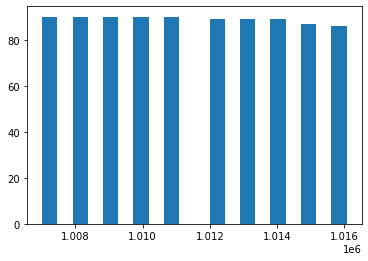

In [53]:
plt.hist(df_test['galactic year'], bins =20)

(array([361., 180., 180., 360., 180., 180., 180., 360., 180., 180., 180.,
        360., 180.,  90.,  90., 180.,  90.,  90.,  89., 175.]),
 array([ 990025.  ,  991276.55,  992528.1 ,  993779.65,  995031.2 ,
         996282.75,  997534.3 ,  998785.85, 1000037.4 , 1001288.95,
        1002540.5 , 1003792.05, 1005043.6 , 1006295.15, 1007546.7 ,
        1008798.25, 1010049.8 , 1011301.35, 1012552.9 , 1013804.45,
        1015056.  ]),
 <a list of 20 Patch objects>)

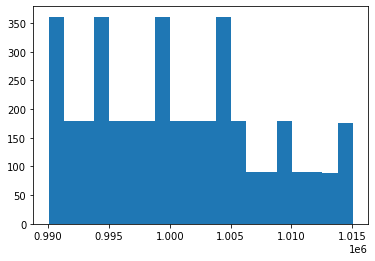

In [54]:
plt.hist(df_train['galactic year'], bins =20)

In [15]:
for galaxy in df_train.galaxy.unique():
    print(galaxy)
    index = df_train[df_train.galaxy == galaxy].index
    impute = SimpleImputer(strategy='mean', fill_value = np.nan, missing_values=np.nan)
    impute.fit(df_train.loc[index, columns])
    df_train.loc[index, columns] = impute.transform(df_train.loc[index, columns])

Large Magellanic Cloud (LMC)


ValueError: Must have equal len keys and value when setting with an ndarray

In [57]:
for galaxy in df_train.galaxy.unique():
    index = df_train[df_train.galaxy == galaxy].index
    for column in columns:
        mean_value = np.mean(df_train.loc[index,column])
        df_train.loc[index, column] = df_train.loc[index, column].fillna(mean_value)

All-NaN slice encountered


In [58]:
np.nanmedian([np.nan,np.nan])

All-NaN slice encountered


nan

In [ ]:
# for galaxy in df_test.galaxy.unique():
#     index = df_test[df_test.galaxy == galaxy].index
#     impute = SimpleImputer(strategy='mean')
#     impute.fit(df_train.loc[index, columns])
#     df_test.loc[index, columns] = impute.transform(df_test.loc[index, columns])

In [65]:
index = df_train[df_train.galaxy == 'Tucana Dwarf'].index

In [66]:
impute = SimpleImputer(strategy='mean')
impute.fit(df_train.loc[index, columns])
df_train.loc[index, columns] = impute.transform(df_train.loc[index, columns])

In [67]:
df_train[df_train.galaxy == 'Tucana Dwarf']

galactic year        galaxy  existence expectancy index  \
4          990025.0  Tucana Dwarf                    0.991196   
188        991020.0  Tucana Dwarf                    1.047298   
411        992016.0  Tucana Dwarf                    0.948264   
671        993012.0  Tucana Dwarf                    0.902668   
741        994009.0  Tucana Dwarf                    0.952121   
1036       995006.0  Tucana Dwarf                    1.088402   
1166       996004.0  Tucana Dwarf                    1.043402   
1359       997002.0  Tucana Dwarf                    1.025836   
1618       998001.0  Tucana Dwarf                    1.019520   
1667       999000.0  Tucana Dwarf                    0.962099   
1908      1000000.0  Tucana Dwarf                    1.032511   
2108      1001000.0  Tucana Dwarf                    1.070591   
2173      1002001.0  Tucana Dwarf                    0.998454   
2420      1003002.0  Tucana Dwarf                    1.014993   
2582      1004004.0  Tucana Dwarf                    1.047680   
2797      1005006.0  Tucana Dwarf                    1.054524   
3005      1006009.0  Tucana Dwarf                    1.014279   
3084      1007012.0  Tucana Dwarf                    1.026890   
3229      1008016.0  Tucana Dwarf                    1.172996   
3252      1009020.0  Tucana Dwarf                    0.928273   
3331      1010025.0  Tucana Dwarf                    1.080518   
3463      1011030.0  Tucana Dwarf                    1.085354   
3539      1012036.0  Tucana Dwarf                    1.041144   
3644      1013042.0  Tucana Dwarf                    1.134405   
3734      1014049.0  Tucana Dwarf                    1.124729   
3845      1015056.0  Tucana Dwarf                    1.081730   

      existence expectancy at birth  Gross income per capita  Income Index  \
4                         81.802464             81033.956906      1.131163   
188                       84.764154             89090.567430      1.192736   
411                       81.625488             84904.991248      1.295898   
671                       87.874019             71730.095754      1.252474   
741                       85.458325             80812.534460      1.195646   
1036                      87.492786             80162.560696      1.126939   
1166                      81.159627             83181.385788      1.184200   
1359                      87.439019            100275.142288      1.105039   
1618                      89.033353             91514.576466      1.165481   
1667                      87.889748             89797.163881      1.124551   
1908                      85.655290             89563.665068      1.269773   
2108                      86.921717             95097.690899      1.151601   
2173                      90.081614             92674.313679      1.280832   
2420                      88.225379             96762.557974      1.210326   
2582                      83.489555            107147.349421      1.131823   
2797                      88.842040            102234.222636      1.246770   
3005                      92.398198            100080.274927      1.361883   
3084                      88.881432             94246.345004      1.226914   
3229                      94.304644             99451.746015      1.166116   
3252                      91.984190             82214.397693      1.085039   
3331                      91.691704             96500.942674      1.190807   
3463                      87.942140             87942.723249      1.177147   
3539                      91.311695             77056.034015      1.150566   
3644                      94.319135             75712.939767      1.069362   
3734                      89.501884             75817.592959      1.146312   
3845                      93.478667             83937.792781      1.146198   

      Expected years of education (galactic years)  \
4                                        13.800672   
188                                

In [60]:
df_train, df_test = preprocessing_all(df_train, df_test, fill_value = -10)

In [47]:
fill_value = -10
coeff = 0.2
num_k = 7
columns = [i for i in df_test.columns if i not in ['galaxy']]
galaxy_train = df_train['galaxy'].unique()
galaxy_test = df_test['galaxy'].unique()   
# Получим колонки - galaxy_del, которые нужно выкинуть из train, так как их не будет в тесте
galaxy_del = list(set(galaxy_train)- set(galaxy_test))
galaxy_del = ['galaxy_'+name for name in galaxy_del] 
# one hot encoding переменной galaxy
df_train = pd.get_dummies(df_train, columns=['galaxy'])
df_test = pd.get_dummies(df_test, columns=['galaxy'])
df_train = df_train.drop(galaxy_del, axis =1)

df_train, df_test, edge_right, edge_left = my_add_feature(df_train, df_test, columns, fill_value, coeff, num_k)
#df_train, df_test = fillna(df_train, df_test, columns, fill_value)

In [42]:
len(df_train['galaxy'].unique()), len(df_test['galaxy'].unique())

(181, 172)

In [ ]:
columns = [i for i in df_test.columns if i not in ['galaxy']]

In [43]:
galaxy_train = df_train['galaxy'].unique()
galaxy_test = df_test['galaxy'].unique()

In [44]:
galaxy_del = list(set(galaxy_train)- set(galaxy_test))
galaxy_del = ['galaxy_'+name for name in galaxy_del]

In [45]:
galaxy_del

['galaxy_Andromeda XXII[57]',
 'galaxy_Andromeda XIX[60]',
 'galaxy_Andromeda XVIII[60]',
 'galaxy_Andromeda XII',
 'galaxy_Andromeda XXIV',
 'galaxy_NGC 5253',
 'galaxy_Tucana Dwarf',
 'galaxy_Triangulum Galaxy (M33)',
 'galaxy_Hercules Dwarf']

In [46]:
set(galaxy_test)- set(galaxy_train)

set()

In [47]:
df_train = pd.get_dummies(df_train, columns=['galaxy'])
df_test = pd.get_dummies(df_test, columns=['galaxy'])

In [48]:
df_train = df_train.drop(galaxy_del, axis =1)

In [17]:
df_train.head()

galactic year  existence expectancy index  existence expectancy at birth  \
0         990025                    0.628657                      63.125200   
1         990025                    0.818082                      81.004994   
2         990025                    0.659443                      59.570534   
3         990025                    0.555862                      52.333293   
4         990025                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3                -1.000000     -1.000000   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                     -1.000000   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                 -1.000000   
1                                  4.742470   
2                                  5.583973   
3                                 -1.000000   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                              -1.000000        -1.000000   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                              -1.000000        -1.000000   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                    -1.000000   
1                                   152.522198   
2                                   209.813266   
3                                    -1.000000   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  \
0                                               -1.0             
1                                               -1.0             
2                                               -1.0             
3                                               -1.0             
4                                               -1.0             

   Population using at least basic sanitation services (%)  \
0                                               -1.0         
1                                               -1.0         
2                                               -1.0         
3                                               -1.0         
4                                               -1.0         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                           -1.000000                    327.202247   
4                           34.497468                    633.799718   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0              22.131436                                         150.259290    
1              89.294181                                         117.069332    
2              57.491083                                         226.523760    
3              47.785456                                         279.000175    
4             103.562629                                          28.359587    

   Mortality rate, infant (per 1,000 live births)  \
0                                      129.841789   
1                                       61.822590   
2                                      134.558437   
3                                      193.228799   
4                                       51.098250   

   Old a

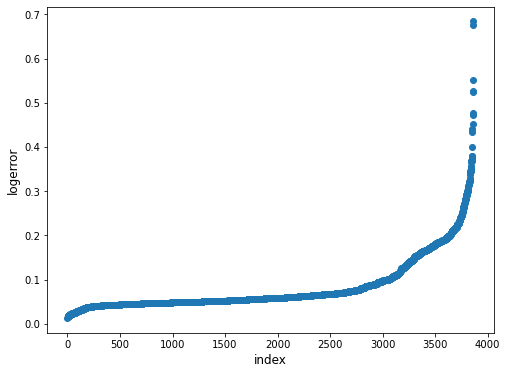

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['y']))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

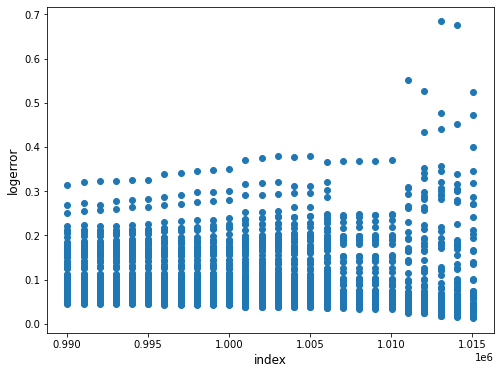

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['galactic year'], df['y'])
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

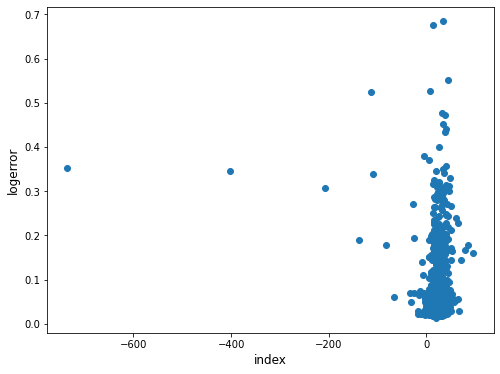

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['Private galaxy capital flows (% of GGP)'], df['y'])
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [ ]:
sns.lmplot(x="Population, total (millions)", y="y", data=df)

In [41]:
np.histogram(test[test['Population, total (millions)'].isnull()==False]['Population, total (millions)'], bins=10)

(array([443, 161,   9,   0,   0,   0,   0,   0,   0,   2], dtype=int64),
 array([ 129.771611  ,  941.60093865, 1753.43026629, 2565.25959394,
        3377.08892159, 4188.91824924, 5000.74757689, 5812.57690454,
        6624.40623219, 7436.23555984, 8248.06488748]))

In [10]:
print(np.median(df[df['Population, total (millions)'].isnull()==False].y))

print(np.mean(df[df['Population, total (millions)'].isnull()==True].y))
print(np.median(df[df['Population, total (millions)'].isnull()==True].y))
print(np.std(df[df['Population, total (millions)'].isnull()==True].y))

0.05553664397530178
0.08225082651343574
0.058596630298028085
0.05608756074725542


In [11]:
df.shape

(3865, 80)

In [298]:
for column in df.columns:
    mean_not_null = np.mean(df[df[column].isnull()==False].y)
    mean_null = np.mean(df[df[column].isnull()==True].y)
    
    median_not_null = np.median(df[df[column].isnull()==False].y)
    median_null = np.median(df[df[column].isnull()==True].y)
    if abs(mean_not_null-mean_null)>0.01 or abs(median_not_null - median_null)>0.01:
        print(f'{column} mean_not_null={round(mean_not_null,3)}, mean_null={round(mean_null,3)}')
        print(f'median_not_null={round(median_not_null,3)}, median_null={round(median_null,3)}')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


existence expectancy index mean_not_null=0.083, mean_null=0.045
median_not_null=0.058, median_null=0.045
existence expectancy at birth mean_not_null=0.083, mean_null=0.045
median_not_null=0.058, median_null=0.045
Gross income per capita mean_not_null=0.083, mean_null=0.068
median_not_null=0.058, median_null=0.048
Income Index mean_not_null=0.083, mean_null=0.068
median_not_null=0.058, median_null=0.048
Expected years of education (galactic years) mean_not_null=0.084, mean_null=0.06
median_not_null=0.058, median_null=0.052
Mean years of education (galactic years) mean_not_null=0.085, mean_null=0.061
median_not_null=0.058, median_null=0.053
Intergalactic Development Index (IDI) mean_not_null=0.085, mean_null=0.06
median_not_null=0.058, median_null=0.053
Education Index mean_not_null=0.085, mean_null=0.06
median_not_null=0.058, median_null=0.053
Intergalactic Development Index (IDI), Rank mean_not_null=0.086, mean_null=0.059
median_not_null=0.058, median_null=0.052
Population with at leas

In [76]:
# drop NAN that missing ratio is above a certain threshold
missing_data = df_test.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index)
missing_ratio = missing_data / len(df_test) * 100
# # print(missing_ratio)
# df = df.drop(missing_ratio[missing_ratio.values > 20].index, axis=1)
# # all_data = all_data.drop(missing_data[missing_data.iloc[:] > 0].index, axis=1)
# df.head(5)

In [79]:
pd.DataFrame(missing_ratio).tail()

0
Intergalactic Development Index (IDI), male, Rank   38.314607
Adjusted net savings                                41.685393
Creature Immunodeficiency Disease prevalence, a...  45.842697
Private galaxy capital flows (% of GGP)             39.775281
Gender Inequality Index (GII)                       40.561798

In [82]:
df_test[['galaxy','Gender Inequality Index (GII)']].galaxy.value_counts()

Wolf-Lundmark-Melotte (WLM, DDO 221)           10
Pegasus Dwarf Irregular (DDO 216)              10
Andromeda X                                    10
Sagittarius Dwarf Irregular Galaxy (SagDIG)    10
Aquarius Dwarf Galaxy (DDO 210)                10
                                               ..
Leo IV Dwarf                                    1
Pisces II                                       1
Pegasus III                                     1
Canes Venatici II Dwarf                         1
Boötes IV                                       1
Name: galaxy, Length: 172, dtype: int64

In [299]:
# drop NAN that missing ratio is above a certain threshold
missing_data = df.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index)
missing_ratio = missing_data / len(df) * 100
# # print(missing_ratio)
# df = df.drop(missing_ratio[missing_ratio.values > 20].index, axis=1)
# # all_data = all_data.drop(missing_data[missing_data.iloc[:] > 0].index, axis=1)
# df.head(5)

In [300]:
df.head()

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                          NaN   
1                                   152.522198   
2                                   209.813266   
3                                          NaN   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Population using at least basic sanitation services (%)  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                                 NaN                    327.202247   
4                           34.497468                    633.799718   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0              22.131436                                         150.259290    
1              89.294181                                         117.069332    
2              57.491083                                         226.523760    
3              47.785456                                         279.000175    
4             103.562629                                          28.359587    

   Mortality rate, infant (per 1,000 live births)  \
0                                      129.841789   
1                                       6

In [9]:
df.head()

galactic year                        galaxy  Gross income per capita  \
0         990025  Large Magellanic Cloud (LMC)             27109.234310   
1         990025              Camelopardalis B             30166.793958   
2         990025                       Virgo I              8441.707353   
3         990025            UGC 8651 (DDO 181)                      NaN   
4         990025                  Tucana Dwarf             81033.956906   

   Income Index  Intergalactic Development Index (IDI), Rank  \
0      0.646039                                          NaN   
1      0.852246                                   152.522198   
2      0.499762                                   209.813266   
3           NaN                                          NaN   
4      1.131163                                    71.885345   

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                                 NaN                    327.202247   
4                           34.497468                    633.799718   

   Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))  \
0                                          12.403812                                  
1                                          13.054898                                  
2                                          15.963001                                  
3                                          12.940991                                  
4                                          25.521926                                  

   Population, ages 15–64 (millions)  \
0                         490.446400   
1                         560.547706   
2                         555.012461   
3                         766.807703   
4                         585.434804   

   Population, ages 65 and older (millions)  \
0                                 60.121580   
1                                 58.573002   
2                                 43.078497   
3                                 51.318372   
4                                 56.158054   

   Population, under age 5 (millions)  \
0                           46.018230   
1                           40.167960   
2                           91.093668   
3                           92.727892   
4                           71.493810   

   Total unemployment rate (female to male ratio)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Vulnerable employment (% of total employment)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Unemployment, total (% of labour force)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Labour force participation rate (% ages 15 and older)  \
0                                          79.614066       
1                                          63.813720       
2                                          80.874149       
3                                          84.721882       
4                                          61.086141       

   Labour force participation rate (% ages 15 and older), female  \
0                                          73.071600               
1                                       

In [301]:
pd.DataFrame(missing_ratio)

0
existence expectancy index                           0.025873
existence expectancy at birth                        0.025873
Gross income per capita                              0.724450
Income Index                                         0.724450
Expected years of education (galactic years)         3.441138
...                                                       ...
Intergalactic Development Index (IDI), male, Rank   76.921087
Adjusted net savings                                76.403622
Creature Immunodeficiency Disease prevalence, a...  75.653299
Private galaxy capital flows (% of GGP)             77.386805
Gender Inequality Index (GII)                       78.163001

[77 rows x 1 columns]

In [136]:
missing_ratio

existence expectancy index                                                    0.025873
existence expectancy at birth                                                 0.025873
Gross income per capita                                                       0.724450
Income Index                                                                  0.724450
Expected years of education (galactic years)                                  3.441138
                                                                               ...    
Intergalactic Development Index (IDI), male, Rank                            76.921087
Adjusted net savings                                                         76.403622
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    75.653299
Private galaxy capital flows (% of GGP)                                      77.386805
Gender Inequality Index (GII)                                                78.163001
Length: 77, dtype: float64

In [184]:
missing_ratio['Mortality rate, infant (per 1,000 live births)']

67.42561448900388

In [196]:
missing_ratio['existence expectancy index']

0.0258732212160414

In [121]:
len(missing_ratio), sum(missing_ratio>60)

(77, 66)

In [122]:
'galaxy' in missing_ratio.index

False

In [123]:
'galactic year' in missing_ratio.index

False

In [124]:
df.shape

(3865, 80)

In [182]:
Intergalactic Development Index (IDI)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

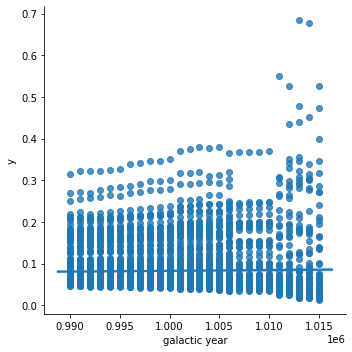

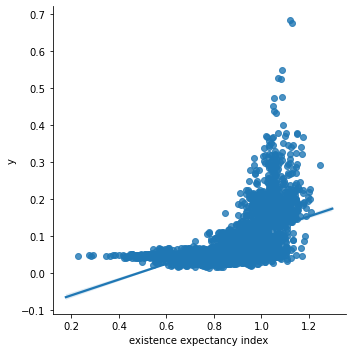

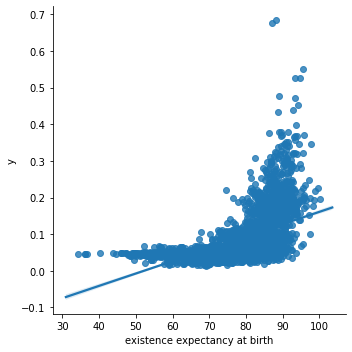

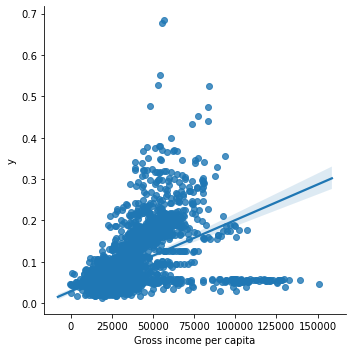

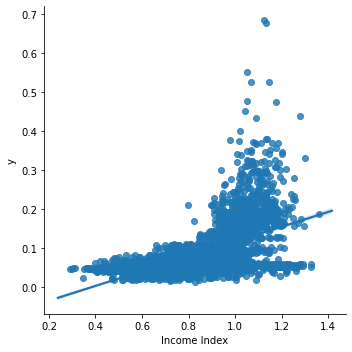

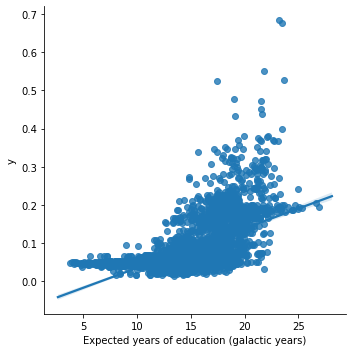

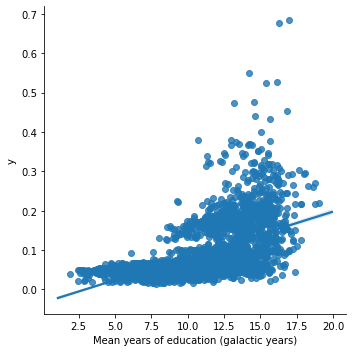

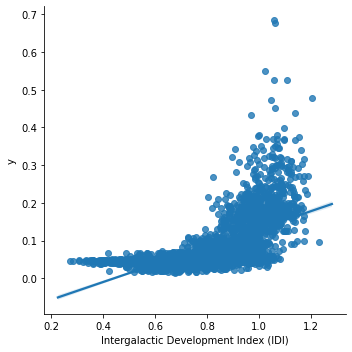

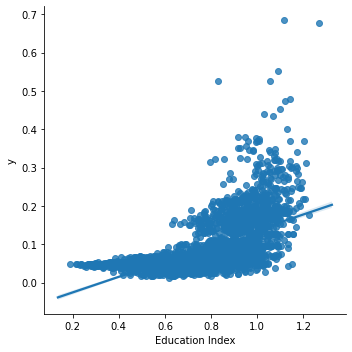

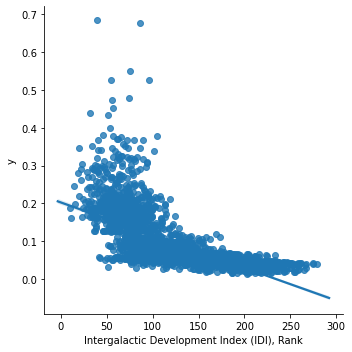

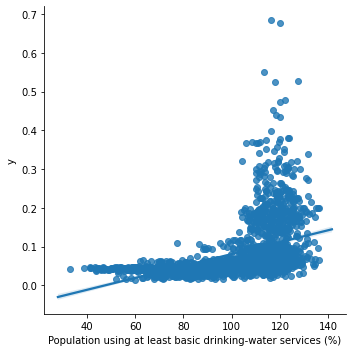

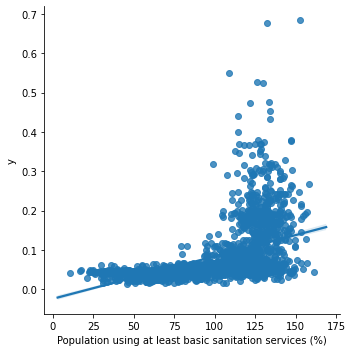

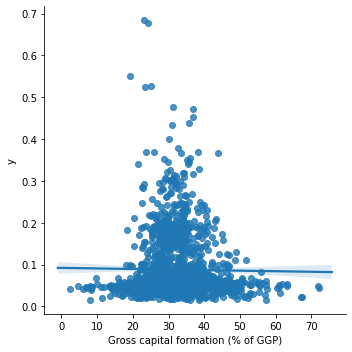

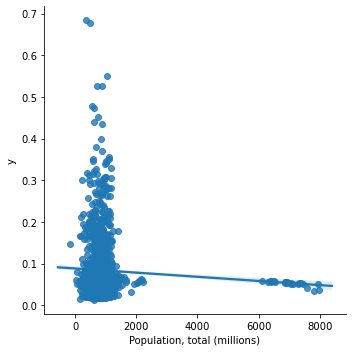

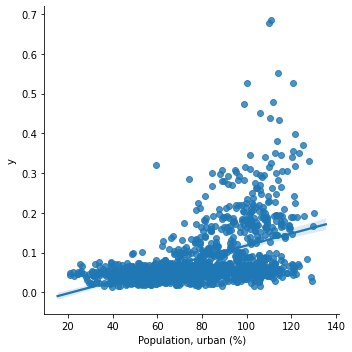

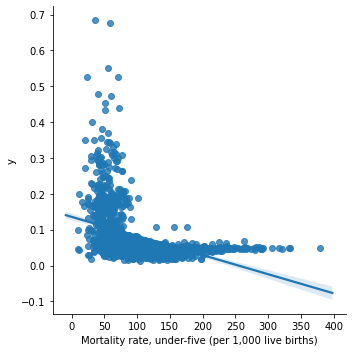

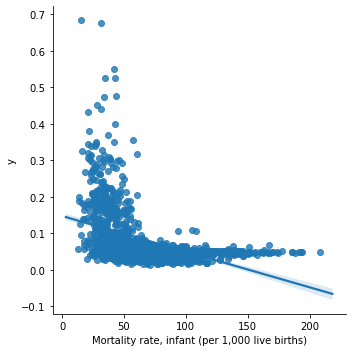

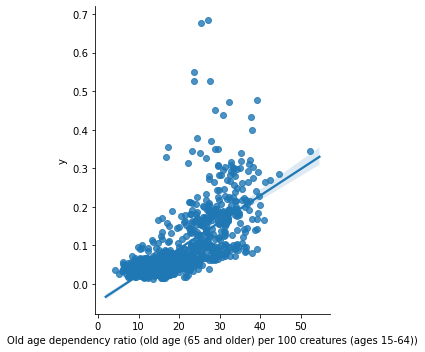

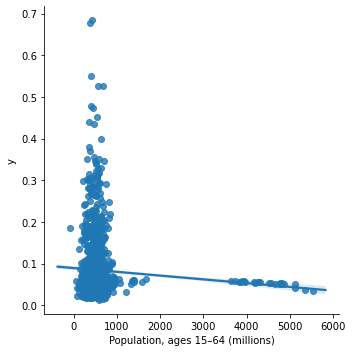

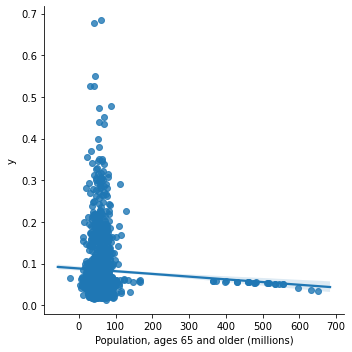

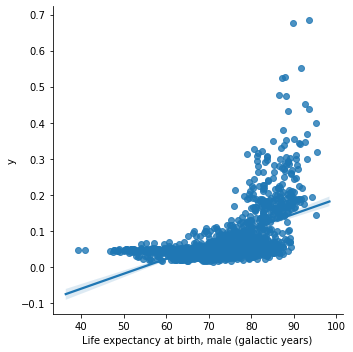

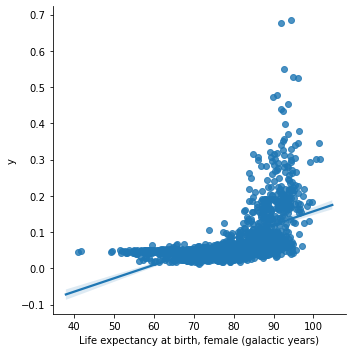

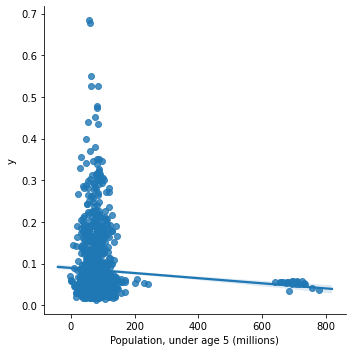

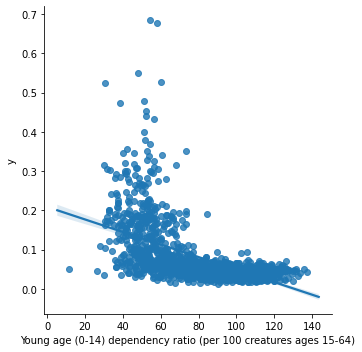

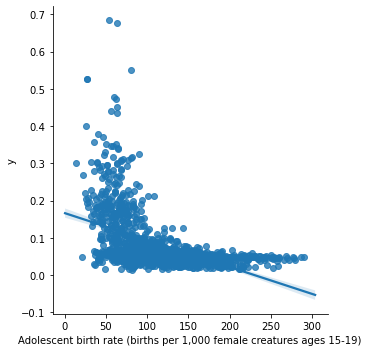

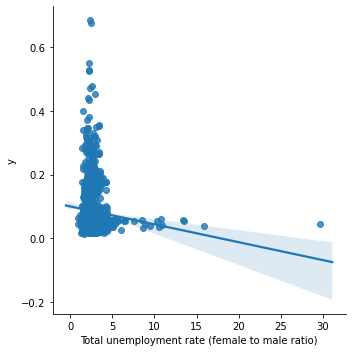

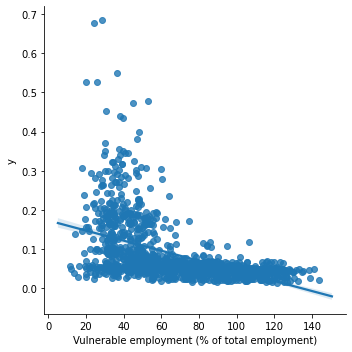

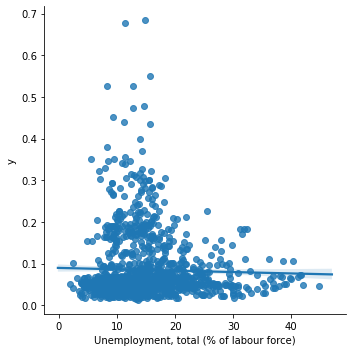

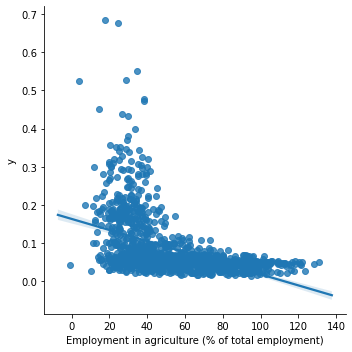

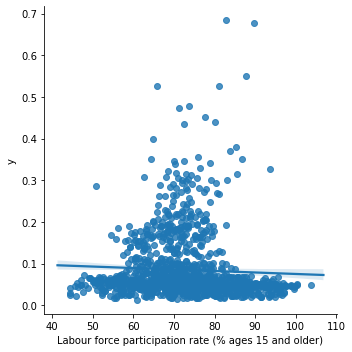

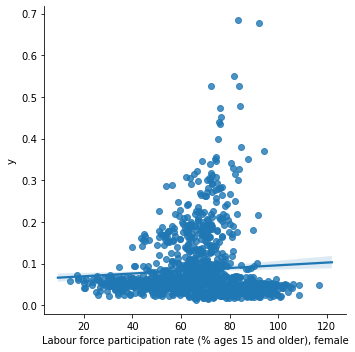

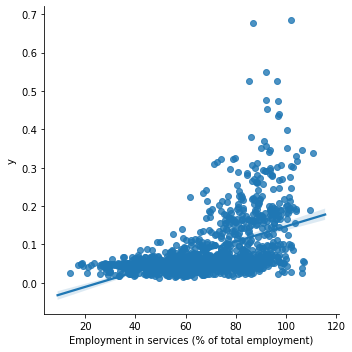

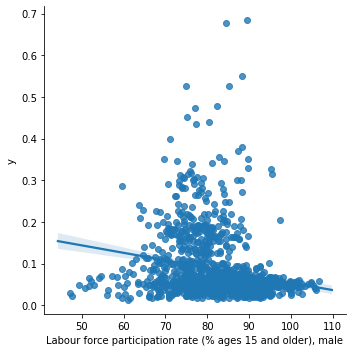

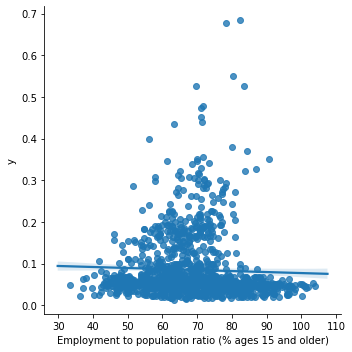

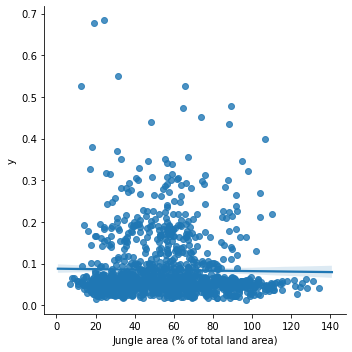

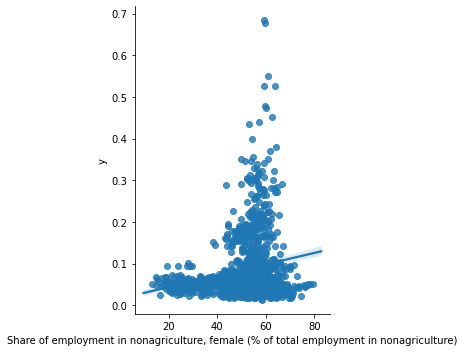

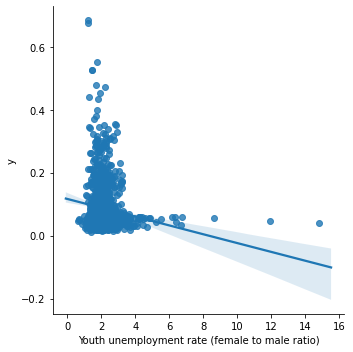

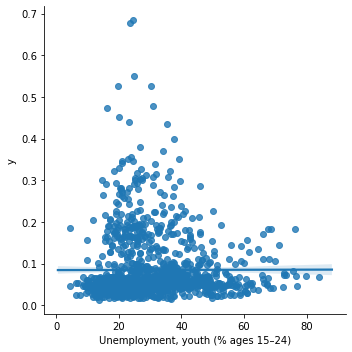

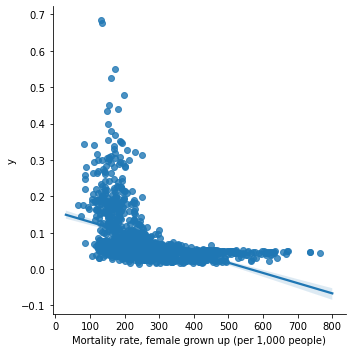

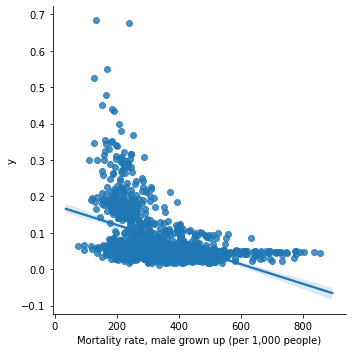

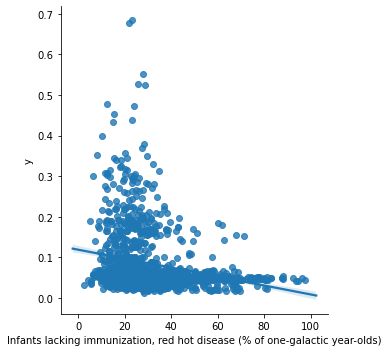

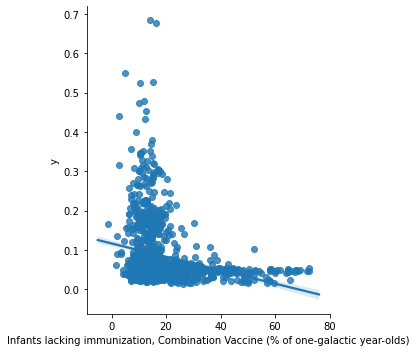

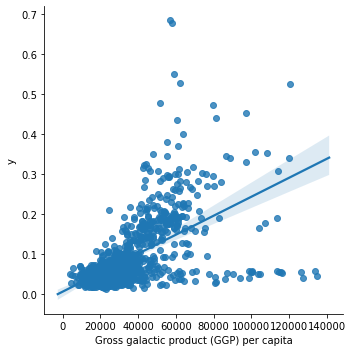

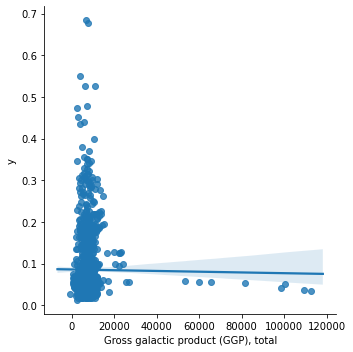

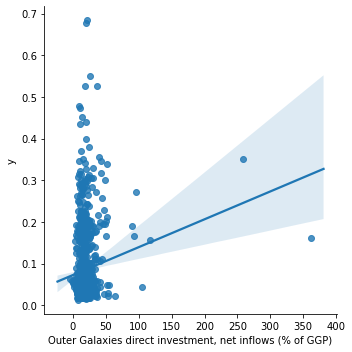

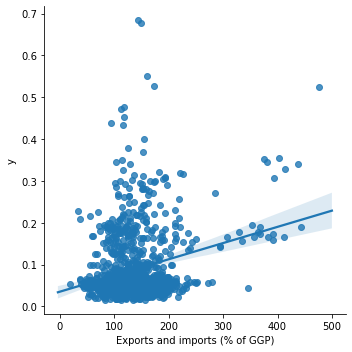

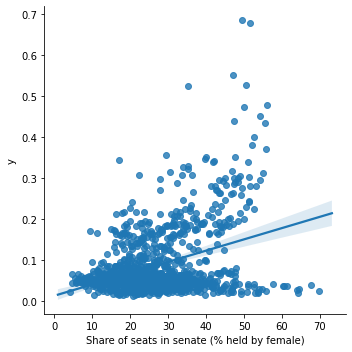

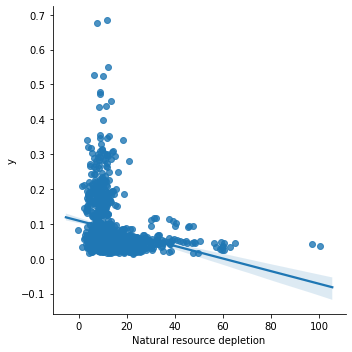

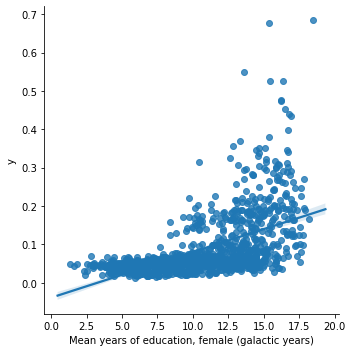

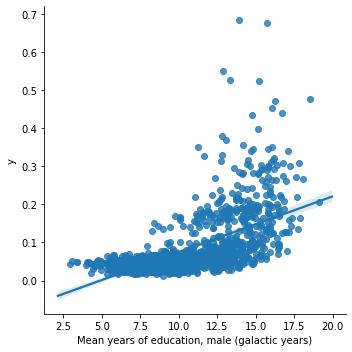

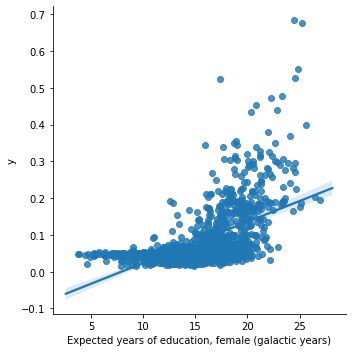

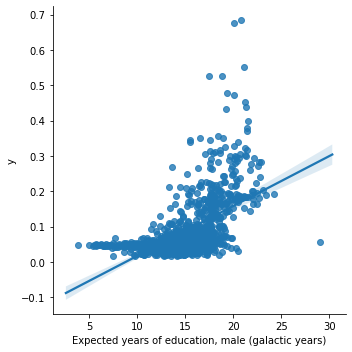

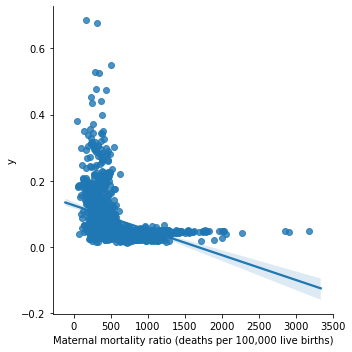

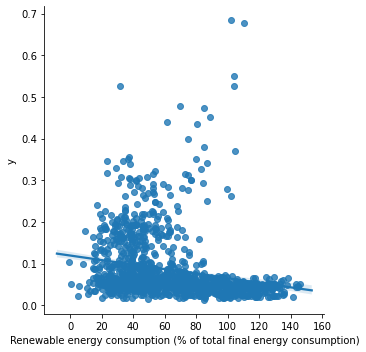

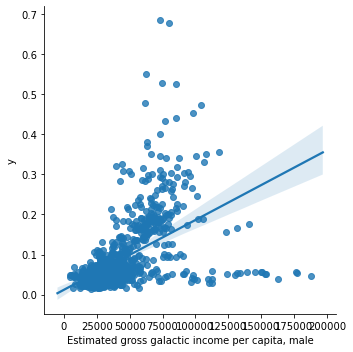

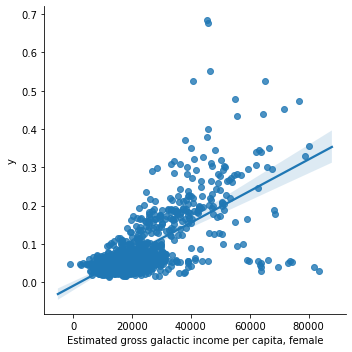

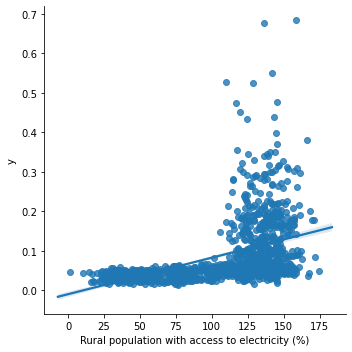

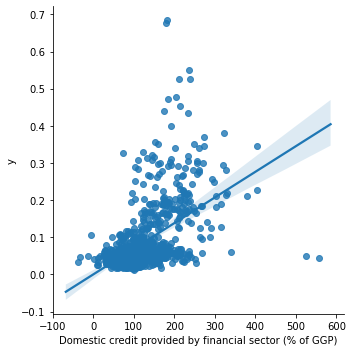

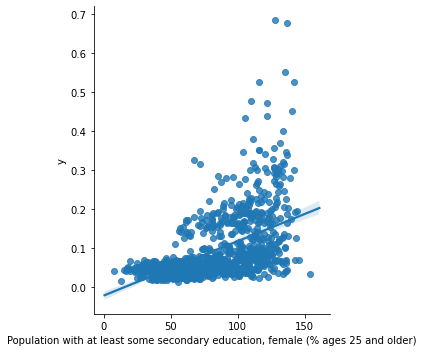

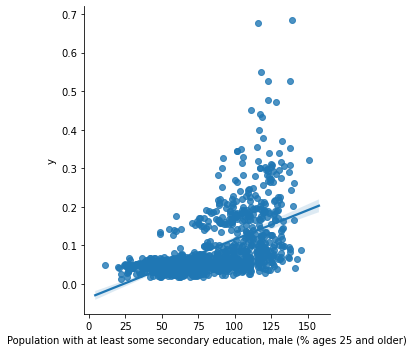

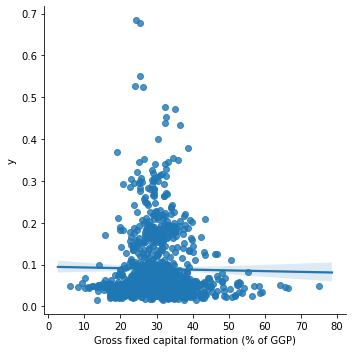

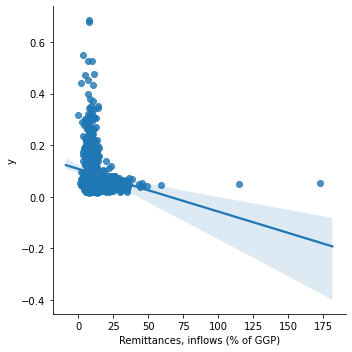

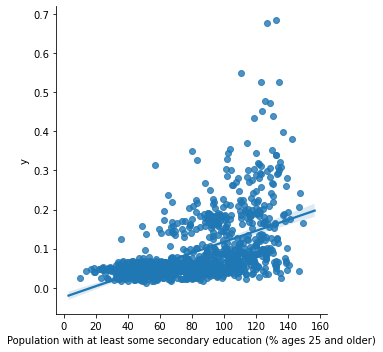

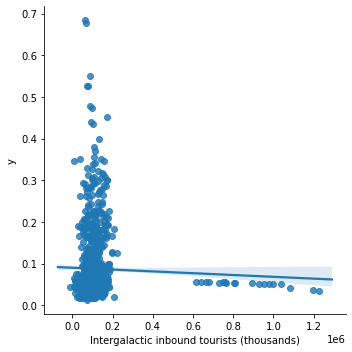

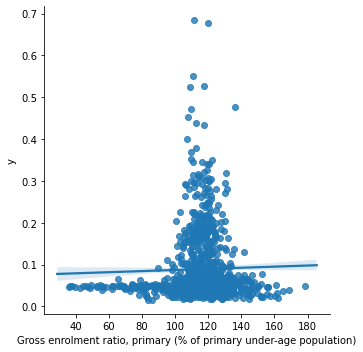

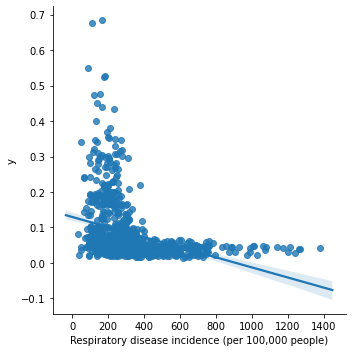

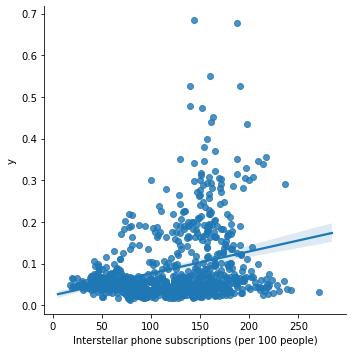

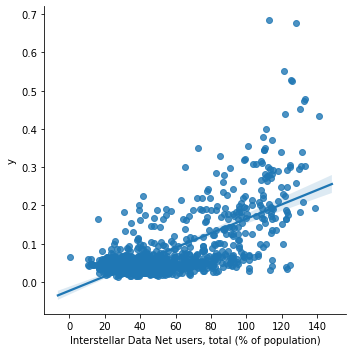

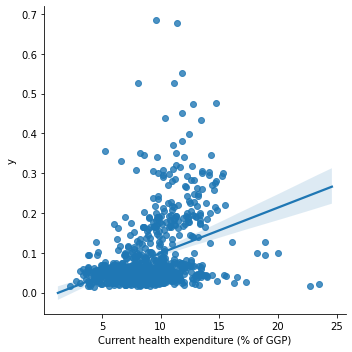

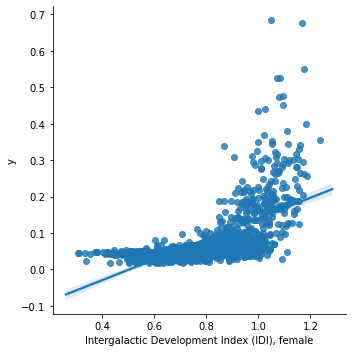

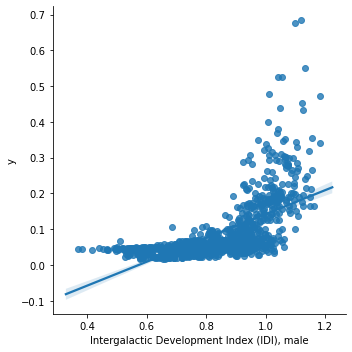

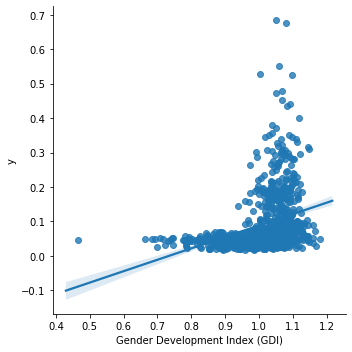

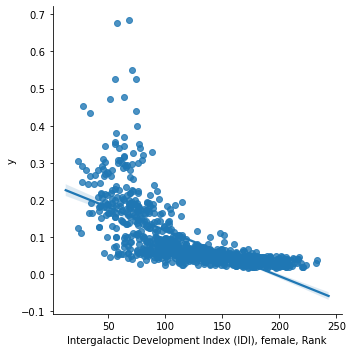

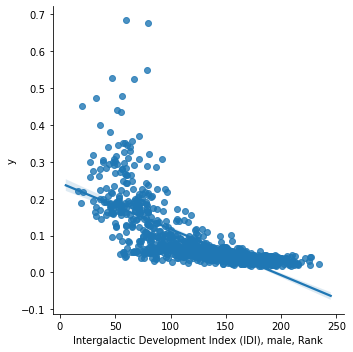

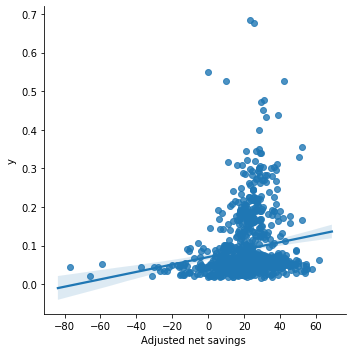

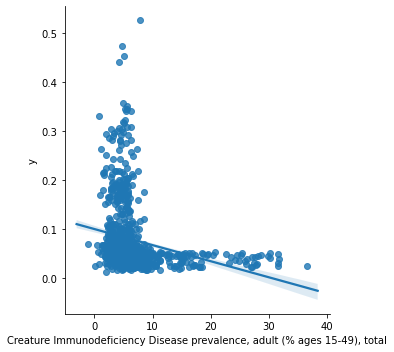

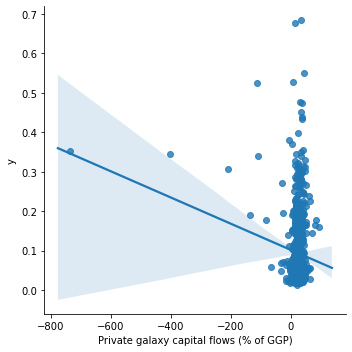

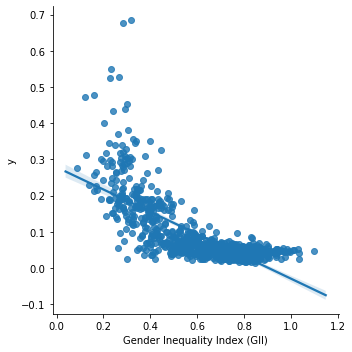

In [183]:
for column in columns:
    sns.lmplot(x=column, y="y", data=df)

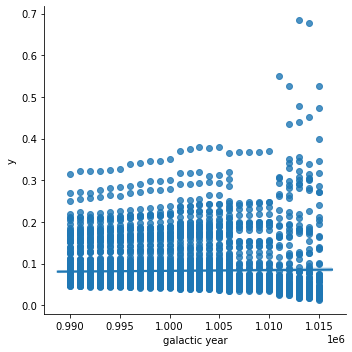

In [77]:
sns.lmplot(x='galactic year', y='y', data=df_train)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

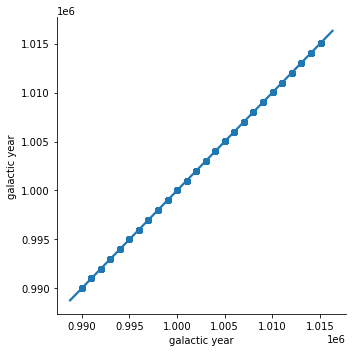

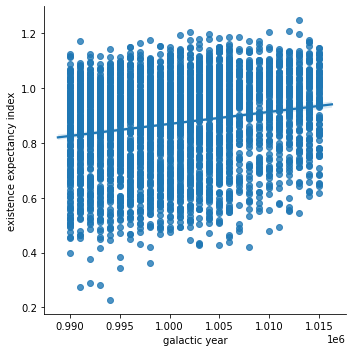

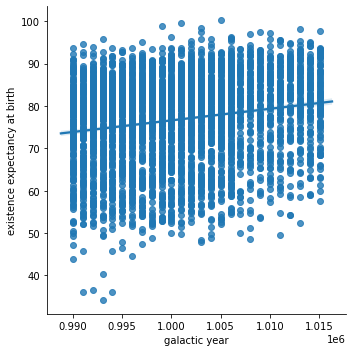

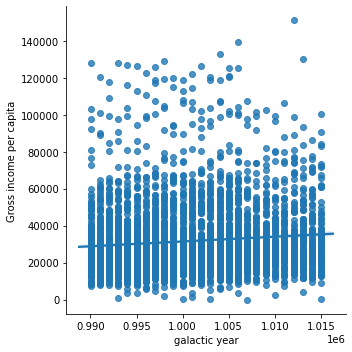

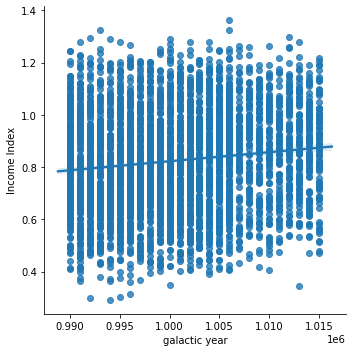

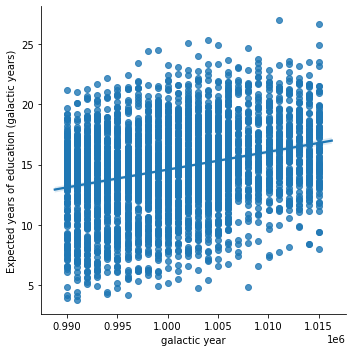

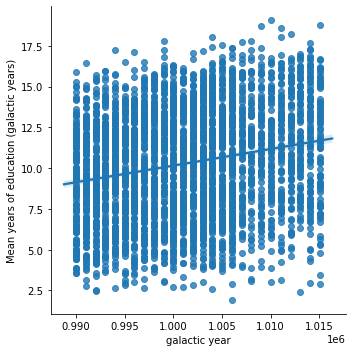

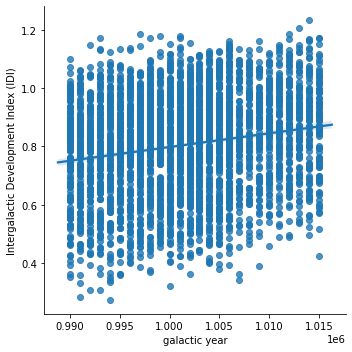

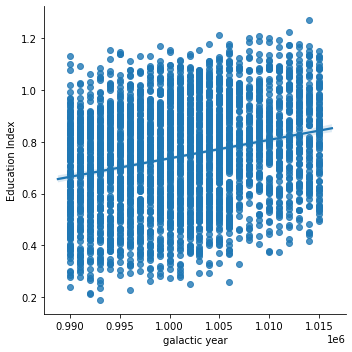

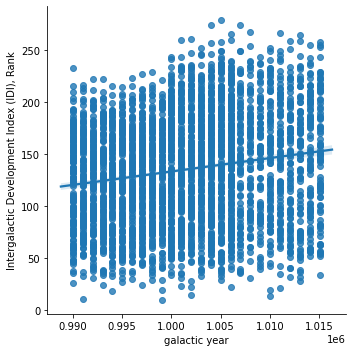

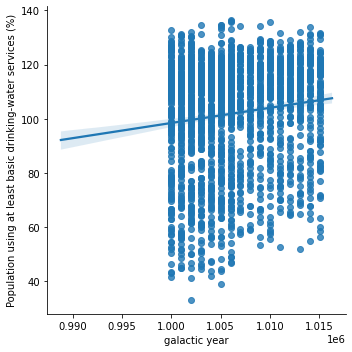

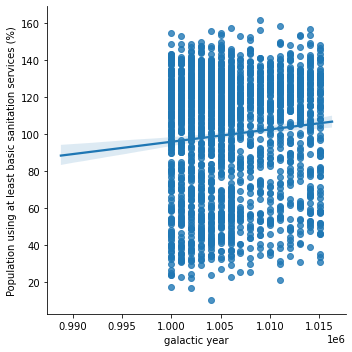

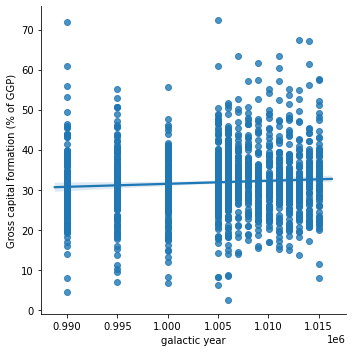

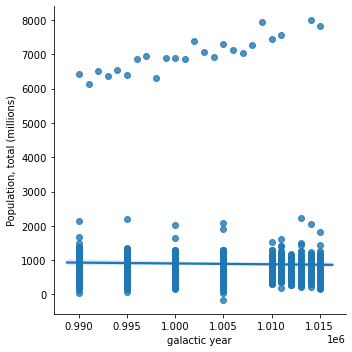

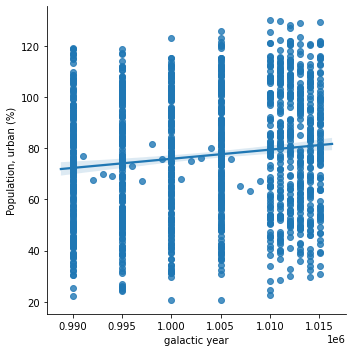

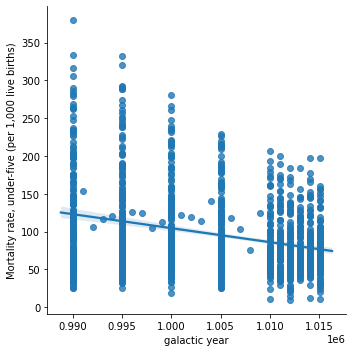

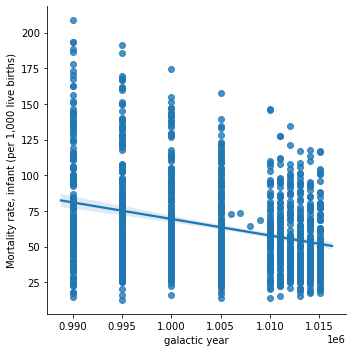

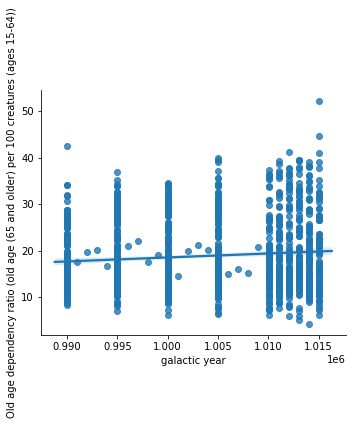

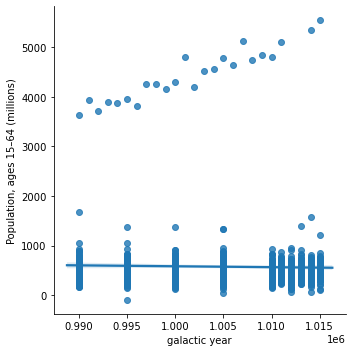

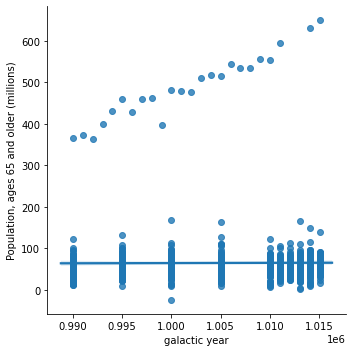

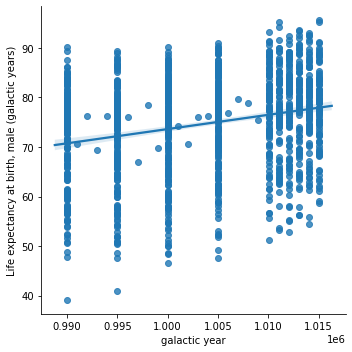

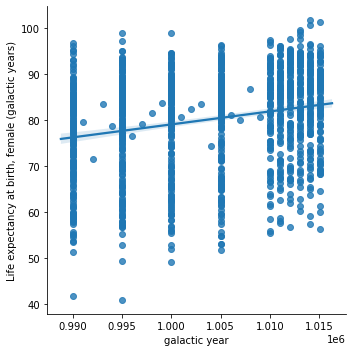

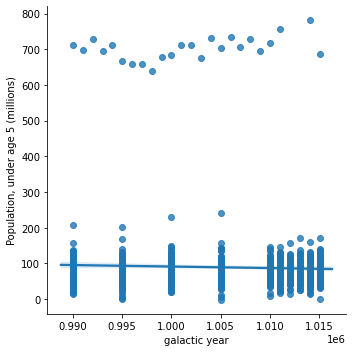

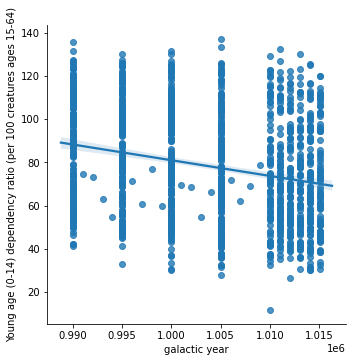

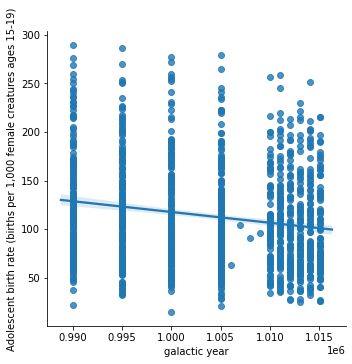

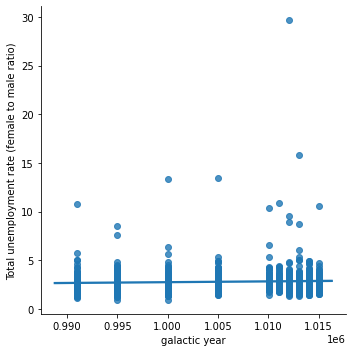

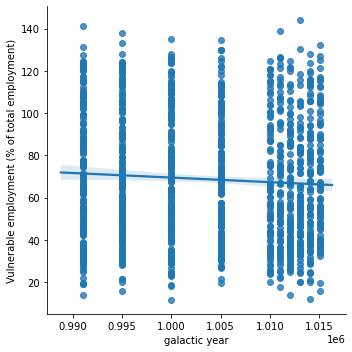

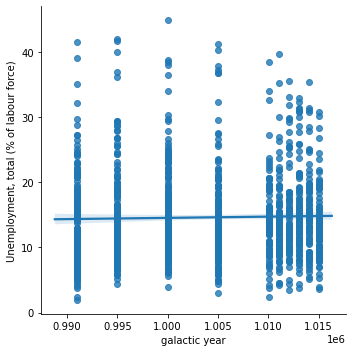

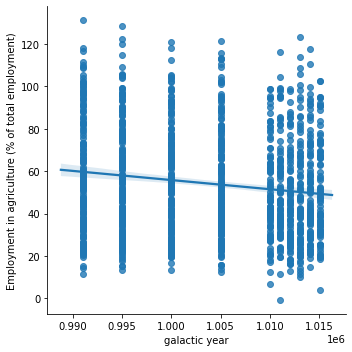

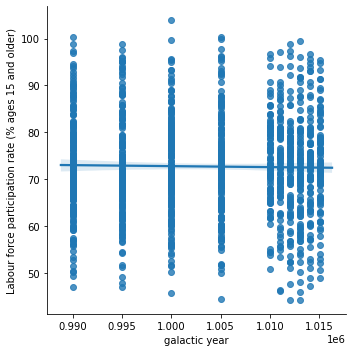

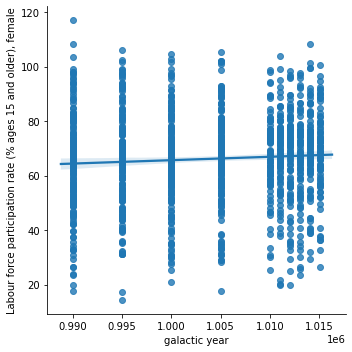

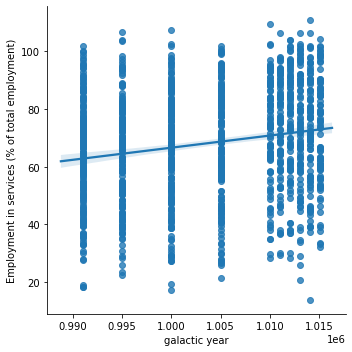

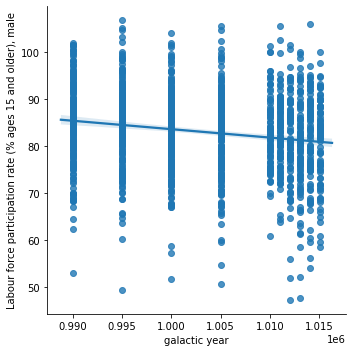

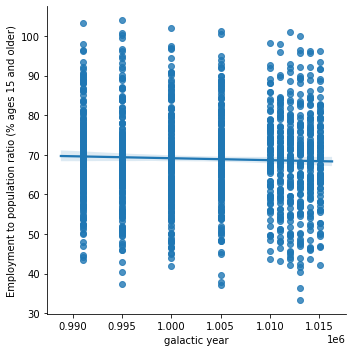

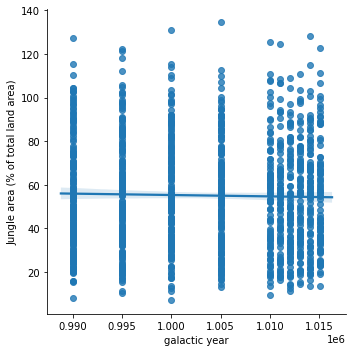

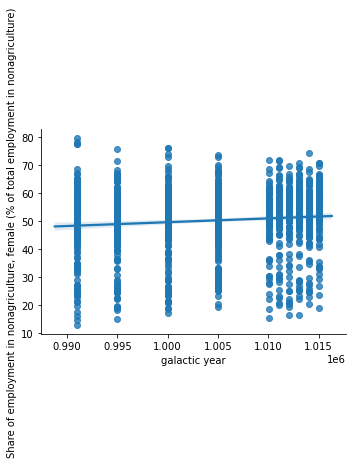

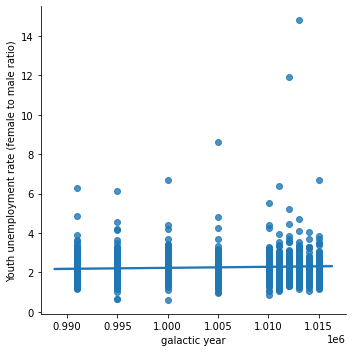

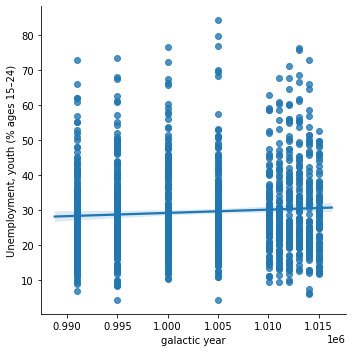

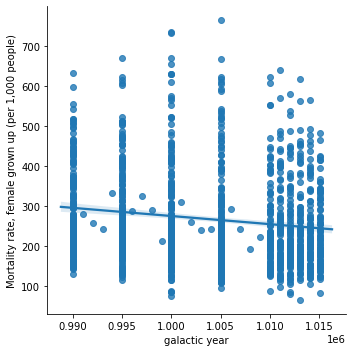

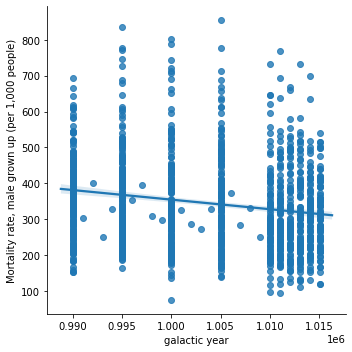

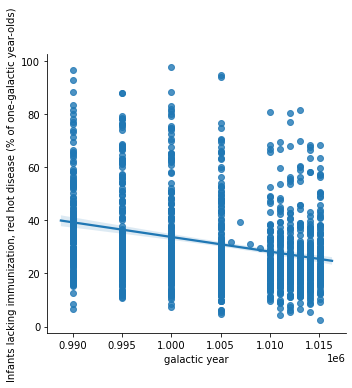

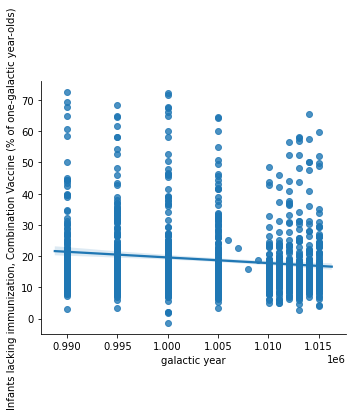

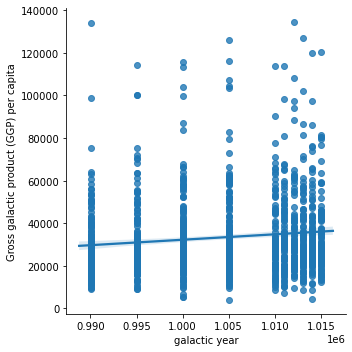

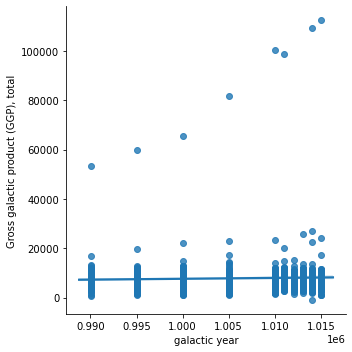

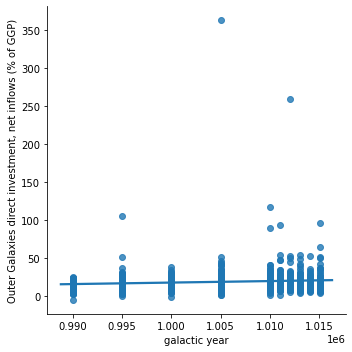

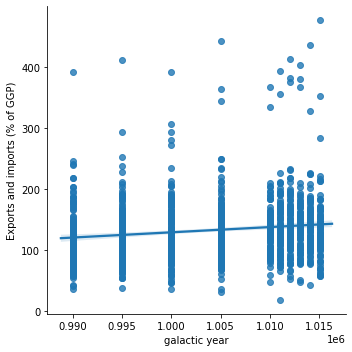

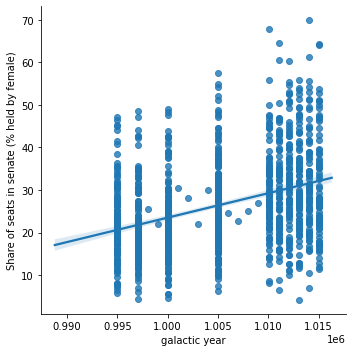

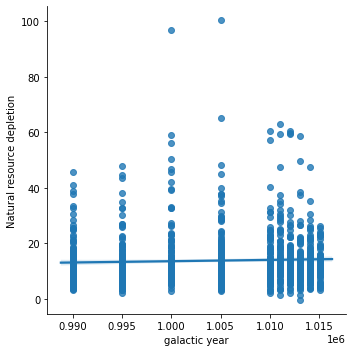

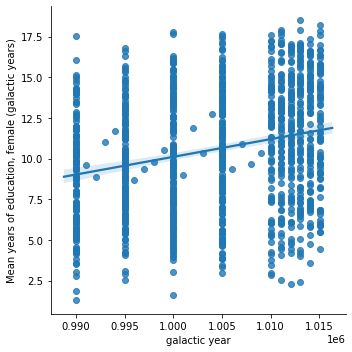

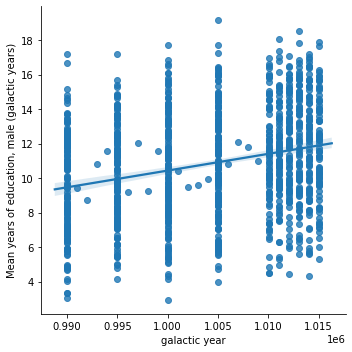

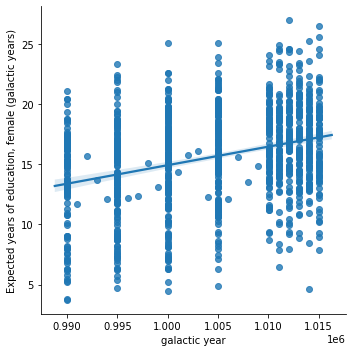

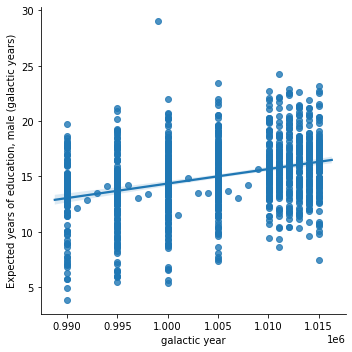

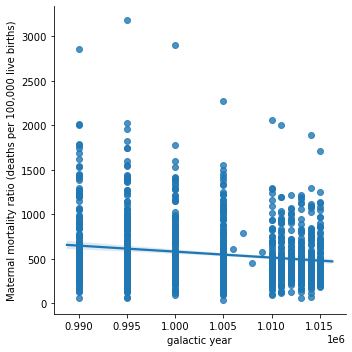

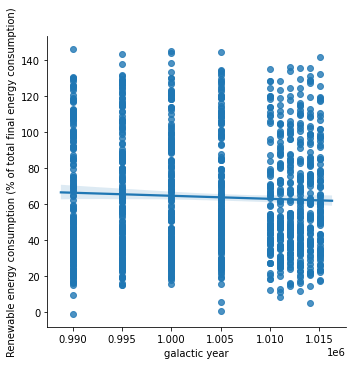

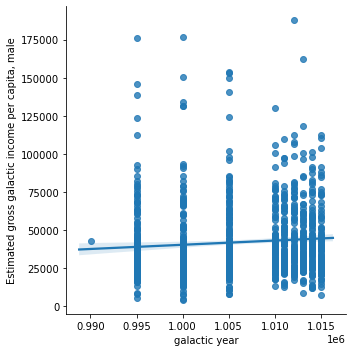

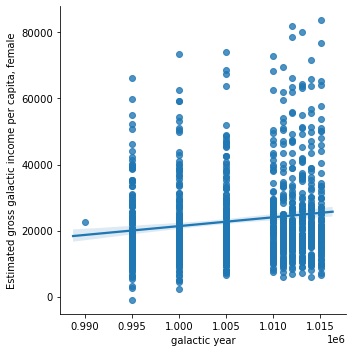

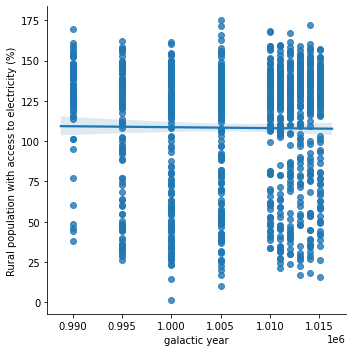

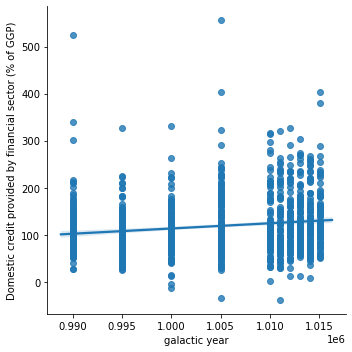

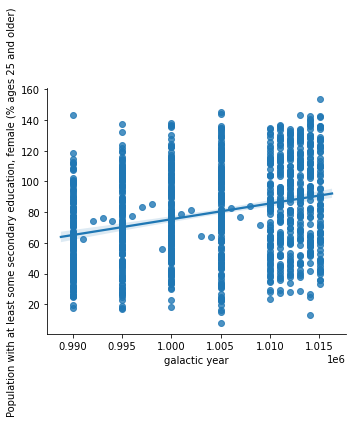

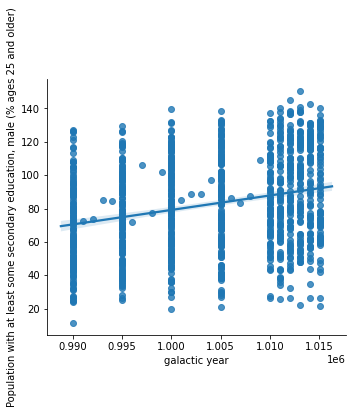

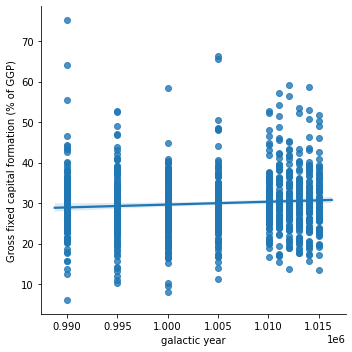

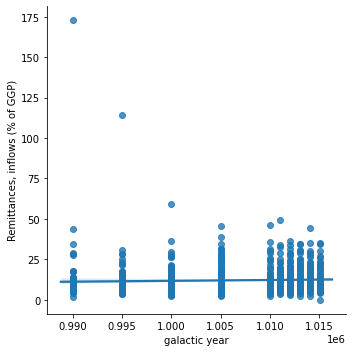

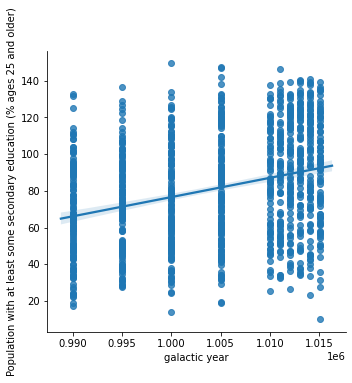

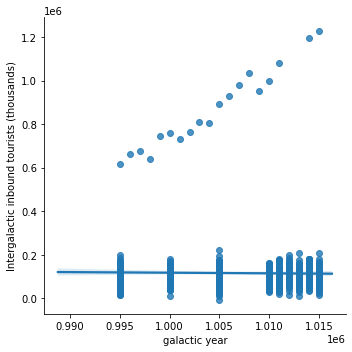

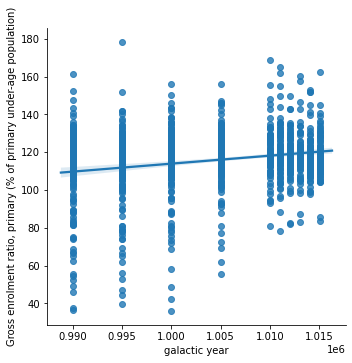

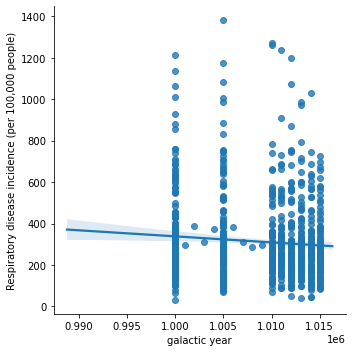

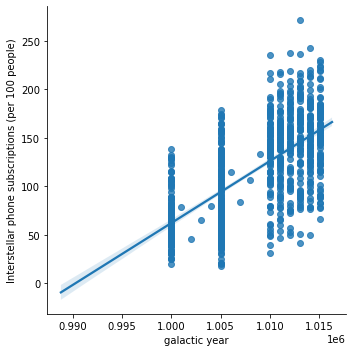

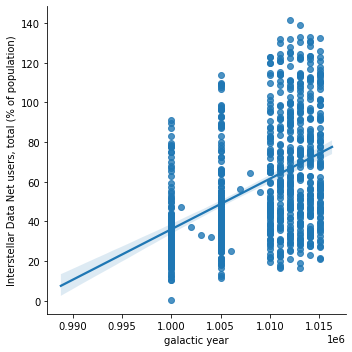

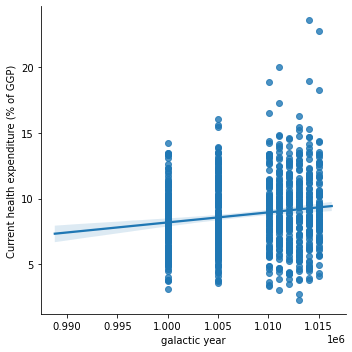

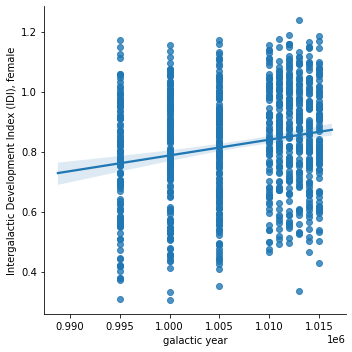

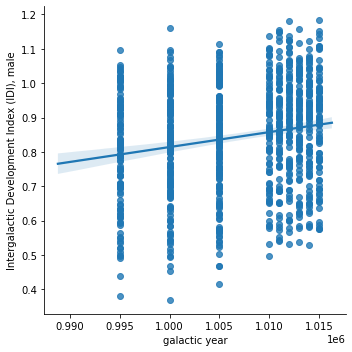

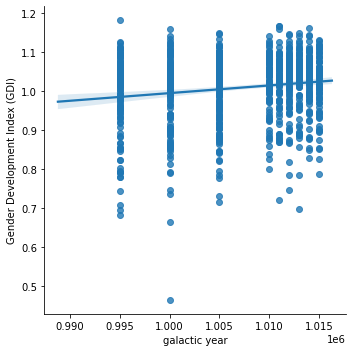

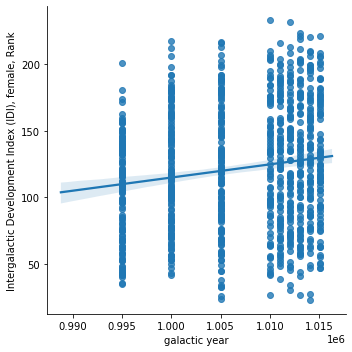

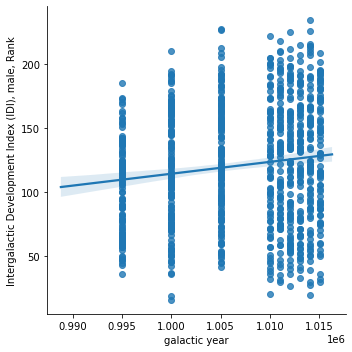

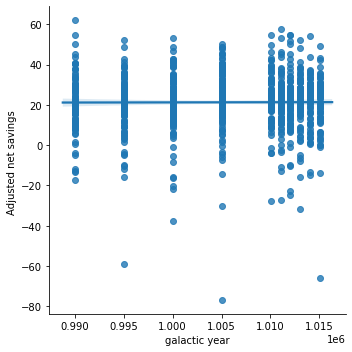

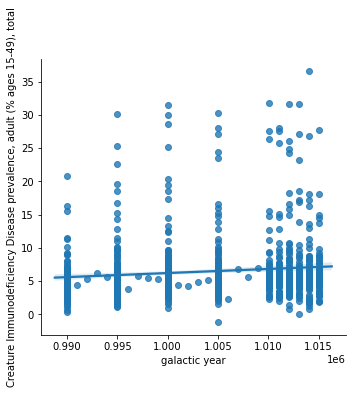

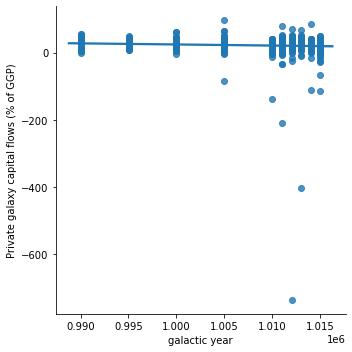

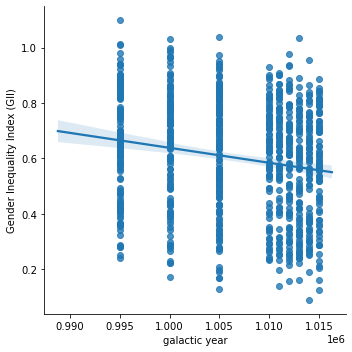

In [76]:
for column in columns:
    sns.lmplot(x='galactic year', y=column, data=df_train)

In [81]:
df_test[df_test['galaxy']=='NGC 1560']

galactic year    galaxy  existence expectancy index  \
351        1013042  NGC 1560                    0.908806   
484        1012036  NGC 1560                    0.964732   

     existence expectancy at birth  Gross income per capita  Income Index  \
351                      79.367365             37384.068975      0.977674   
484                      79.988139             27930.730101      0.953647   

     Expected years of education (galactic years)  \
351                                     14.911052   
484                                     14.135470   

     Mean years of education (galactic years)  \
351                                 11.607551   
484                                 13.143332   

     Intergalactic Development Index (IDI)  Education Index  \
351                               0.936684         0.744938   
484                               0.895357         0.774413   

     Intergalactic Development Index (IDI), Rank  \
351                                          NaN   
484                                          NaN   

     Population using at least basic drinking-water services (%)  \
351                                         108.989494             
484                                         110.072948             

     Population using at least basic sanitation services (%)  \
351                                         101.793532         
484                                          74.764525         

     Gross capital formation (% of GGP)  Population, total (millions)  \
351                           33.222950                   8248.064887   
484                           30.895624                   7443.202184   

     Population, urban (%)  \
351              80.284200   
484              67.347352   

     Mortality rate, under-five (per 1,000 live births)  \
351                                          56.403649    
484                                         124.693910    

     Mortality rate, infant (per 1,000 live births)  \
351                                       69.556981   
484                                       64.299256   

     Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))  \
351                                          21.974631                                  
484                                          23.835807                                  

     Population, ages 15–64 (millions)  \
351                        5269.009974   
484                        5478.741085   

     Population, ages 65 and older (millions)  \
351                                644.186616   
484                                620.246895   

     Life expectancy at birth, male (galactic years)  \
351                                        80.419143   
484                                        72.772768   

     Life expectancy at birth, female (galactic years)  \
351                                          87.266113   
484                                          81.086799   

     Population, under age 5 (millions)  \
351                          766.198104   
484                          751.846826   

     Young age (0-14) dependency ratio (per 100 creatures ages 15-64)  \
351                                          68.226408                  
484                                          68.616203                  

     Adolescent birth rate (births per 1,000 female creatures ages 15-19)  \
351                                         102.680997                      
484                                         119.328631                      

     Total unemployment rate (female to male ratio)  \
351                                        2.725287   
484                                        3.024153   

     Vulnerable employment (% of total employment)  \
351                                      74.481946   
484                                      60.053479   

     Unemployment, total (% of labour force)  \
351                                11.

In [80]:
df_train[df_train['Population, ages 65 and older (millions)']>300]

galactic year    galaxy  existence expectancy index  \
103          990025  NGC 1560                    0.850194   
203          991020  NGC 1560                    0.854956   
502          992016  NGC 1560                    0.853754   
636          993012  NGC 1560                    0.874899   
721          994009  NGC 1560                    0.825329   
976          995006  NGC 1560                    0.817002   
1142         996004  NGC 1560                    0.888768   
1417         997002  NGC 1560                    0.922569   
1499         998001  NGC 1560                    0.865654   
1712         999000  NGC 1560                    0.870789   
1890        1000000  NGC 1560                    0.859679   
2156        1001000  NGC 1560                    0.888999   
2283        1002001  NGC 1560                    0.928287   
2386        1003002  NGC 1560                    0.861070   
2684        1004004  NGC 1560                    0.916623   
2760        1005006  NGC 1560                    0.908095   
2983        1006009  NGC 1560                    0.937222   
3106        1007012  NGC 1560                    0.895656   
3175        1008016  NGC 1560                    0.917412   
3283        1009020  NGC 1560                    0.891208   
3413        1010025  NGC 1560                    0.982797   
3485        1011030  NGC 1560                    0.929841   
3693        1014049  NGC 1560                    0.916682   
3850        1015056  NGC 1560                    1.038376   

      existence expectancy at birth  Gross income per capita  Income Index  \
103                       73.936217             28786.500687      0.842928   
203                       77.259948             23358.450701      0.827307   
502                       77.348611             32646.706209      0.940288   
636                       79.715402             28751.710392      0.804616   
721                       74.112839             18438.213872      0.921891   
976                       80.874039             17802.381946      0.838031   
1142                      81.084166             37751.394816      0.881862   
1417                      74.317941             22511.633015      0.924188   
1499                      76.182528             18952.645838      0.945791   
1712                      78.371082             17345.505353      0.886916   
1890                      81.907687             16263.485258      0.833915   
2156                      76.218419             35323.596651      0.967423   
2283                      75.452399             46937.901620      0.775420   
2386                      82.159036             24539.579567      0.922915   
2684                      75.598123             28312.082997      0.993171   
2760                      75.354809             40377.686979      0.843542   
2983                      84.487688             24971.044849      0.911724   
3106                      78.292946             39158.418938      0.911347   
3175                      80.432206             32533.243946      0.945480   
3283                      76.916742             16700.204080      0.894448   
3413                      80.058077             28361.507533      0.911771   
3485                      82.597012             30292.366408      0.982256   
3693                      80.306999             16741.993763      0.997925   
3850                      78.421583             25044.462199      0.970445   

      Expected years of education (galactic years)  \
103                                      13.420806   
203                                      14.185751   
502                                      14.102159   
636                                      12.351811   
721                                      12.906719   
976                                      13.075014   
1142                                     10.982392   
1417                                     14.369875   
1499                                     12

In [28]:
df[df['Intergalactic Development Index (IDI)'].isnull()==True].shape

(391, 80)

In [29]:
df[df['Education Index'].isnull()==True].shape

(391, 80)

In [50]:
def my_add_feature(df_train, df_test, columns, fill_value, coef, num_k):
    edge_right= defaultdict()
    edge_left = defaultdict()    
    for column in columns:
        df_col = df_train[df_train[column].isnull()==False][[column,'y']]
        st = stats.binned_statistic(df_col[column], df_col['y'], statistic='mean', bins=20)

        # Ищем фичи и границу для них, распределение которых выглядит как нижний правый угол
        min_value = st.statistic[0] * (1 - coef)
        max_value = st.statistic[0] * (1 + coef)
        k=0
        mask = ~np.isnan(st.statistic)
        for value, edge in zip(st.statistic[mask], st.bin_edges[:-1][mask]):
            if (value>=min_value) & (value<=max_value):
                k+=1
            else:
                if k>num_k:
                    #print(k, round(edge,2),'right', column)
                    edge_right[column] = edge
                break
        # Ищем фичи и границу для них, распределение которых выглядит как нижний левый угол        
        min_value = st.statistic[-1] * (1 - coef)
        max_value = st.statistic[-1] * (1 + coef)
        k=0
        mask = ~np.isnan(st.statistic)
        for value, edge in zip(st.statistic[mask][::-1], st.bin_edges[1:][mask][::-1]):
            if (value >= min_value) & (value <= max_value):
                k+=1
            else:
                if k>num_k:
                    #print(k, np.round(edge,2), 'left', column)
                    edge_left[column] = edge
                break        
    # Теперь создаём новые фичи на основе отобранных             
    for column in edge_left.keys():
        column1 = 'const__' + column
        column2 = 'varios__' + column
        column3 = 'nan__' + column
        df_train[column1] = df_train[column].apply(lambda x: 1 if x >= edge_left[column] else 0)
        df_train[column2] = df_train[column].apply(lambda x: x if x < edge_left[column] else fill_value)
        df_train[column3] = df_train[column].apply(lambda x: 1 if np.isnan(x) else 0)
        #df_train = df_train.drop(column, axis=1)
    for column in edge_right.keys():
        column1 = 'const__' + column
        column2 = 'varios__' + column
        column3 = 'nan__' + column
        df_train[column1] = df_train[column].apply(lambda x: 1 if x <= edge_right[column] else 0 )
        df_train[column2] = df_train[column].apply(lambda x: x if x > edge_right[column] else fill_value)
        df_train[column3] = df_train[column].apply(lambda x: 1 if np.isnan(x) else 0)
        #df_train = df_train.drop(column, axis=1)
        
    for column in edge_left.keys():
        column1 = 'const__' + column
        column2 = 'varios__' + column
        column3 = 'nan__' + column
        df_test[column1] = df_test[column].apply(lambda x: 1 if x >= edge_left[column] else 0)
        df_test[column2] = df_test[column].apply(lambda x: x if x < edge_left[column] else fill_value)
        df_test[column3] = df_test[column].apply(lambda x: 1 if np.isnan(x) else 0)
        #df_train = df_train.drop(column, axis=1)
    for column in edge_right.keys():
        column1 = 'const__' + column
        column2 = 'varios__' + column
        column3 = 'nan__' + column
        df_test[column1] = df_test[column].apply(lambda x: 1 if x <= edge_right[column] else 0 )
        df_test[column2] = df_test[column].apply(lambda x: x if x > edge_right[column] else fill_value)
        df_test[column3] = df_test[column].apply(lambda x: 1 if np.isnan(x) else 0)
        #df_train = df_train.drop(column, axis=1)    
    return  df_train, df_test, edge_right, edge_left

In [51]:
df_train, df_test, edge_right, edge_left = my_add_feature(df_train, df_test, columns, -10, 0.2, 7)

In [53]:
df_train.head()

galactic year  existence expectancy index  existence expectancy at birth  \
0         990025                    0.628657                      63.125200   
1         990025                    0.818082                      81.004994   
2         990025                    0.659443                      59.570534   
3         990025                    0.555862                      52.333293   
4         990025                    0.991196                      81.802464   

   Gross income per capita  Income Index  \
0             27109.234310      0.646039   
1             30166.793958      0.852246   
2              8441.707353      0.499762   
3                      NaN           NaN   
4             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank  \
0                                          NaN   
1                                   152.522198   
2                                   209.813266   
3                                          NaN   
4                                    71.885345   

   Population using at least basic drinking-water services (%)  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Population using at least basic sanitation services (%)  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                                 NaN                    327.202247   
4                           34.497468                    633.799718   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0              22.131436                                         150.259290    
1              89.294181                                         117.069332    
2              57.491083                                         226.523760    
3              47.785456                                         279.000175    
4             103.562629                                          28.359587    

   Mortality rate, infant (per 1,000 live births)  \
0                                      129.841789   
1                                       61.822590   
2                                      134.558437   
3                                      193.228799   
4                                       51.098250   

   Old a

In [13]:
for column in df.columns:
    if column not in 'galaxy':
        if min(df[column])<0:
            print(min(df[column]), column)

-126.90652154198006 Gross income per capita
-160.43617880443858 Population, total (millions)
-91.29459531850377 Population, ages 15–64 (millions)
-23.65871489977571 Population, ages 65 and older (millions)
-2.0894593877278376 Population, under age 5 (millions)
-1.3195745685692786 Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)
-933.2228059122264 Gross galactic product (GGP), total
-5.266100932269703 Outer Galaxies direct investment, net inflows (% of GGP)
-0.3745485855025997 Natural resource depletion
-1.0479572972181996 Renewable energy consumption (% of total final energy consumption)
-38.29520003468214 Domestic credit provided by financial sector (% of GGP)
-10.0 const__Mortality rate, under-five (per 1,000 live births)
-10.0 varios__Mortality rate, under-five (per 1,000 live births)
-10.0 const__Mortality rate, infant (per 1,000 live births)
-10.0 varios__Mortality rate, infant (per 1,000 live births)
-10.0 const__Young age (0-14) dependency ratio (p

In [14]:
for column in df.columns:
    if df[df[column].isnull()==True].shape[0]>0:
        print(column, df[df[column].isnull()==True].shape[0])

Gross income per capita 28
Income Index 28
Intergalactic Development Index (IDI), Rank 433
Gross capital formation (% of GGP) 2363
Population, total (millions) 2594
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)) 2601
Population, ages 15–64 (millions) 2601
Population, ages 65 and older (millions) 2601
Population, under age 5 (millions) 2601
Total unemployment rate (female to male ratio) 2628
Vulnerable employment (% of total employment) 2628
Unemployment, total (% of labour force) 2628
Labour force participation rate (% ages 15 and older) 2628
Labour force participation rate (% ages 15 and older), female 2628
Labour force participation rate (% ages 15 and older), male 2628
Employment to population ratio (% ages 15 and older) 2628
Jungle area (% of total land area) 2631
Youth unemployment rate (female to male ratio) 2629
Unemployment, youth (% ages 15–24) 2629
Infants lacking immunization, red hot disease (% of one-galactic year-olds) 2646
Infants lackin

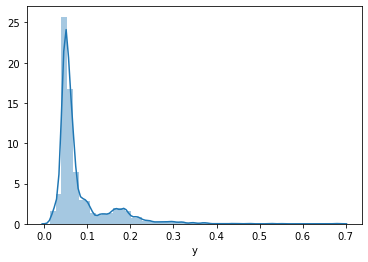

In [127]:
sns.distplot(df['y']);

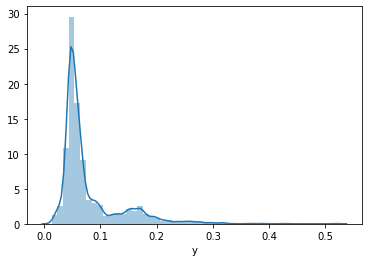

In [128]:
sns.distplot(np.log1p(df['y']));

In [58]:
def fillna(df_train, df_test, columns, value):
    for column in columns:
        if column in df_train.columns:
            df_train[column] = df_train[column].fillna(value)
    for column in columns:
        if column in df_test.columns:
            df_test[column] = df_test[column].fillna(value)  
    return df_train, df_test

In [59]:
df_train, df_test = fillna(df_train, df_test, columns, -10)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('y', axis=1), df_train['y'],shuffle=False, test_size=0.1, random_state=42)

In [11]:
max(X_train['galactic year'])

1011030

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('y', axis=1), df_train['y'], test_size=0.2, random_state=42)

In [62]:
#X_train.shape, X_test.shape

In [26]:
X_train = df_train.drop('y', axis=1)
y_train = df_train['y']

In [124]:
#X_test = df_test#.drop('y', axis=1)
#y_test = df_test['y']

In [125]:
# X_train= X_train.drop('galaxy', axis=1)
# X_test= X_test.drop('galaxy', axis=1)

In [65]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [66]:
# model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model = lgb.LGBMRegressor(objective='regression',num_leaves=12,
                              learning_rate=0.01, n_estimators = 700)
score = rmsle_cv(model)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0173 (0.0034)



In [67]:
score

array([0.01399924, 0.01905225, 0.02247964, 0.01330513, 0.01765663])

In [33]:
# model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model = lgb.LGBMRegressor(objective='regression',num_leaves=12,
                              learning_rate=0.01, n_estimators = 700)
score = rmsle_cv(model)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0164 (0.0126)



In [34]:
score

array([0.00815403, 0.01230595, 0.01020835, 0.00990767, 0.04141801])

In [32]:
score

array([0.00752317, 0.01025347, 0.00836482, 0.00810359, 0.03885466])

## Without my features 

In [93]:
# gbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.01, n_estimators = 1000)

In [94]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='RMSE',
        early_stopping_rounds=10)

[1]	valid_0's rmse: 0.0606486	valid_0's l2: 0.00367826
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 0.0601622	valid_0's l2: 0.00361949
[3]	valid_0's rmse: 0.0596822	valid_0's l2: 0.00356196
[4]	valid_0's rmse: 0.0592147	valid_0's l2: 0.00350638
[5]	valid_0's rmse: 0.0587512	valid_0's l2: 0.00345171
[6]	valid_0's rmse: 0.0582916	valid_0's l2: 0.00339791
[7]	valid_0's rmse: 0.0578503	valid_0's l2: 0.00334666
[8]	valid_0's rmse: 0.0574003	valid_0's l2: 0.00329479
[9]	valid_0's rmse: 0.0569691	valid_0's l2: 0.00324548
[10]	valid_0's rmse: 0.0565317	valid_0's l2: 0.00319584
[11]	valid_0's rmse: 0.0561167	valid_0's l2: 0.00314909
[12]	valid_0's rmse: 0.0557014	valid_0's l2: 0.00310264
[13]	valid_0's rmse: 0.0552788	valid_0's l2: 0.00305574
[14]	valid_0's rmse: 0.0548765	valid_0's l2: 0.00301143
[15]	valid_0's rmse: 0.0544765	valid_0's l2: 0.00296769
[16]	valid_0's rmse: 0.0540661	valid_0's l2: 0.00292314
[17]	valid_0's rmse: 0.0536877	valid_0's l2: 0.0028

[148]	valid_0's rmse: 0.0299683	valid_0's l2: 0.000898097
[149]	valid_0's rmse: 0.0299201	valid_0's l2: 0.000895211
[150]	valid_0's rmse: 0.029874	valid_0's l2: 0.000892457
[151]	valid_0's rmse: 0.0298311	valid_0's l2: 0.000889892
[152]	valid_0's rmse: 0.0297591	valid_0's l2: 0.000885604
[153]	valid_0's rmse: 0.0297197	valid_0's l2: 0.000883258
[154]	valid_0's rmse: 0.0296785	valid_0's l2: 0.000880816
[155]	valid_0's rmse: 0.0296195	valid_0's l2: 0.000877316
[156]	valid_0's rmse: 0.0295772	valid_0's l2: 0.000874808
[157]	valid_0's rmse: 0.0295308	valid_0's l2: 0.000872068
[158]	valid_0's rmse: 0.0294752	valid_0's l2: 0.000868789
[159]	valid_0's rmse: 0.0294382	valid_0's l2: 0.00086661
[160]	valid_0's rmse: 0.0293799	valid_0's l2: 0.000863177
[161]	valid_0's rmse: 0.0293373	valid_0's l2: 0.000860677
[162]	valid_0's rmse: 0.0292881	valid_0's l2: 0.00085779
[163]	valid_0's rmse: 0.0292383	valid_0's l2: 0.000854876
[164]	valid_0's rmse: 0.0292083	valid_0's l2: 0.000853126
[165]	valid_0's r

[300]	valid_0's rmse: 0.0267998	valid_0's l2: 0.000718229
[301]	valid_0's rmse: 0.0267865	valid_0's l2: 0.000717514
[302]	valid_0's rmse: 0.0267826	valid_0's l2: 0.000717305
[303]	valid_0's rmse: 0.0267761	valid_0's l2: 0.000716961
[304]	valid_0's rmse: 0.0267744	valid_0's l2: 0.000716869
[305]	valid_0's rmse: 0.0267716	valid_0's l2: 0.000716718
[306]	valid_0's rmse: 0.0267606	valid_0's l2: 0.000716128
[307]	valid_0's rmse: 0.0267533	valid_0's l2: 0.000715739
[308]	valid_0's rmse: 0.0267555	valid_0's l2: 0.000715857
[309]	valid_0's rmse: 0.0267452	valid_0's l2: 0.000715308
[310]	valid_0's rmse: 0.0267443	valid_0's l2: 0.000715255
[311]	valid_0's rmse: 0.0267392	valid_0's l2: 0.000714986
[312]	valid_0's rmse: 0.0267375	valid_0's l2: 0.000714896
[313]	valid_0's rmse: 0.0267317	valid_0's l2: 0.000714584
[314]	valid_0's rmse: 0.0267278	valid_0's l2: 0.000714374
[315]	valid_0's rmse: 0.0267254	valid_0's l2: 0.000714248
[316]	valid_0's rmse: 0.0267191	valid_0's l2: 0.000713911
[317]	valid_0'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=50,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [95]:
shap_values = shap.TreeExplainer(gbm).shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


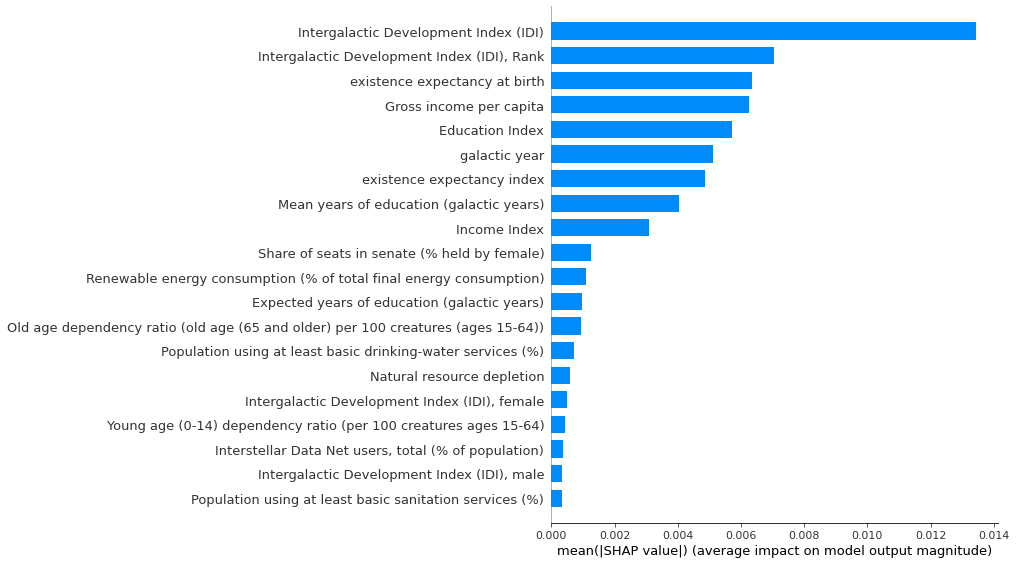

In [96]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

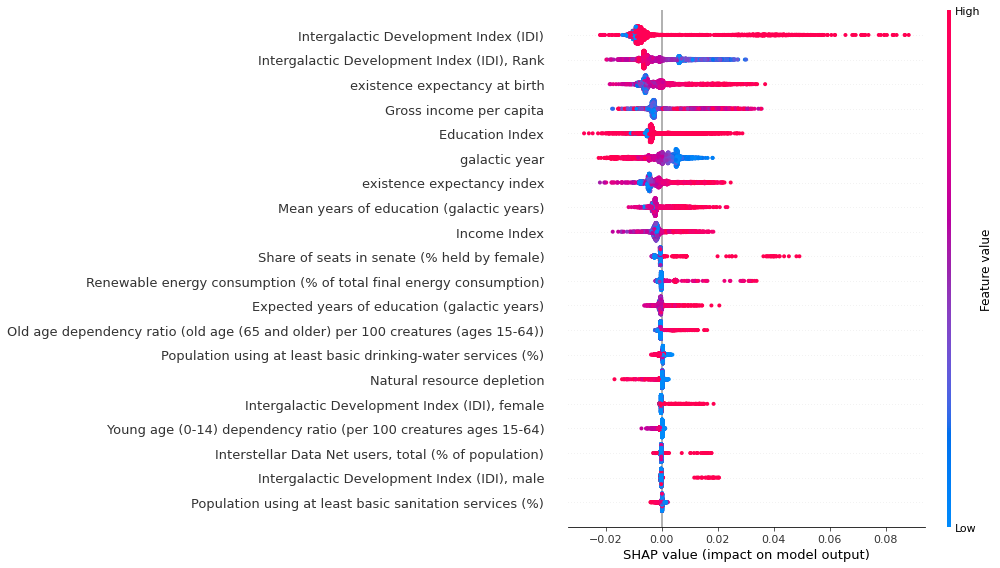

In [97]:
shap.summary_plot(shap_values, X_train)

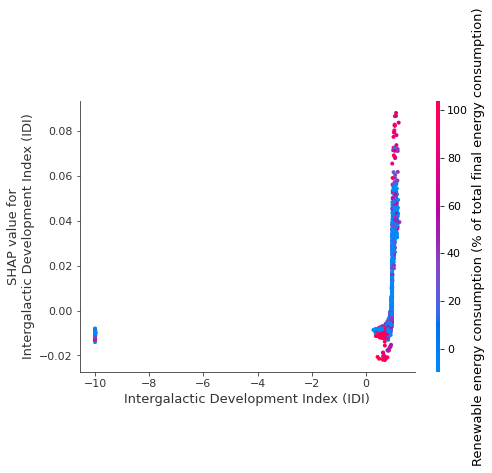

In [98]:
shap.dependence_plot("Intergalactic Development Index (IDI)", shap_values, X_train)

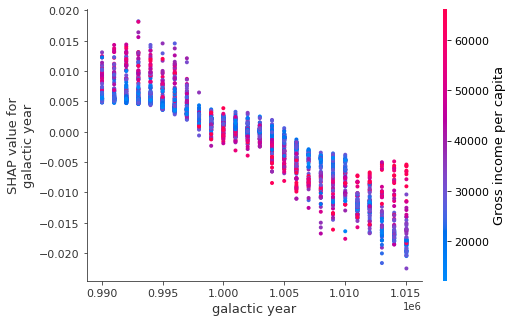

In [99]:
shap.dependence_plot("galactic year", shap_values, X_train)

## With my features 

In [91]:
def train_model(df_train, percent_val = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(df_train.drop('y', axis=1), df_train['y'], test_size=percent_val)
    gbm = lgb.LGBMRegressor(objective='regression',num_leaves=12,
                              learning_rate=0.01, n_estimators = 1000)
    gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='RMSE',
        early_stopping_rounds=10)
    predict = gbm.predict(X_test)
    return X_train, X_test, y_train, y_test, gbm, predict 

In [6]:
X_train, X_test, y_train, y_test, gbm, predict = train_model(df_train)

NameError: name 'df_train_galaxy' is not defined

In [96]:
# gbm = lgb.LGBMRegressor(objective='regression',num_leaves=50,
#                               learning_rate=0.05, n_estimators=1720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5,# feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
gbm = lgb.LGBMRegressor(objective='rmse', max_depth=13, num_leaves=38, learning_rate=0.010, colsample_bytree=0.700,
                        subsample=0.966, n_estimators=523)

In [95]:
# gbm = lgb.LGBMRegressor(objective='regression',num_leaves=50,
#                               learning_rate=0.05, n_estimators=1720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5,# feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
gbm = lgb.LGBMRegressor(objective='rmse',max_depth=5, num_leaves=26, learning_rate=0.060, colsample_bytree=0.800,
                        subsample=0.968, n_estimators=451)

In [97]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='RMSE')
#        early_stopping_rounds=10)

[1]	valid_0's rmse: 0.107219
[2]	valid_0's rmse: 0.106568
[3]	valid_0's rmse: 0.106059
[4]	valid_0's rmse: 0.105459
[5]	valid_0's rmse: 0.104845
[6]	valid_0's rmse: 0.104291
[7]	valid_0's rmse: 0.103727
[8]	valid_0's rmse: 0.103195
[9]	valid_0's rmse: 0.102655
[10]	valid_0's rmse: 0.102143
[11]	valid_0's rmse: 0.101646
[12]	valid_0's rmse: 0.101092
[13]	valid_0's rmse: 0.100551
[14]	valid_0's rmse: 0.100013
[15]	valid_0's rmse: 0.0995278
[16]	valid_0's rmse: 0.0989964
[17]	valid_0's rmse: 0.0985258
[18]	valid_0's rmse: 0.0980564
[19]	valid_0's rmse: 0.0975375
[20]	valid_0's rmse: 0.097024
[21]	valid_0's rmse: 0.0965785
[22]	valid_0's rmse: 0.0961372
[23]	valid_0's rmse: 0.0956446
[24]	valid_0's rmse: 0.0951981
[25]	valid_0's rmse: 0.0947234
[26]	valid_0's rmse: 0.0942847
[27]	valid_0's rmse: 0.0938255
[28]	valid_0's rmse: 0.0933757
[29]	valid_0's rmse: 0.092918
[30]	valid_0's rmse: 0.0924984
[31]	valid_0's rmse: 0.0921026
[32]	valid_0's rmse: 0.0916948
[33]	valid_0's rmse: 0.091256
[34

[267]	valid_0's rmse: 0.0536737
[268]	valid_0's rmse: 0.0536307
[269]	valid_0's rmse: 0.0535823
[270]	valid_0's rmse: 0.0535432
[271]	valid_0's rmse: 0.0534956
[272]	valid_0's rmse: 0.0534557
[273]	valid_0's rmse: 0.0534208
[274]	valid_0's rmse: 0.0533946
[275]	valid_0's rmse: 0.0533542
[276]	valid_0's rmse: 0.0533216
[277]	valid_0's rmse: 0.0532782
[278]	valid_0's rmse: 0.0532362
[279]	valid_0's rmse: 0.0532031
[280]	valid_0's rmse: 0.0531539
[281]	valid_0's rmse: 0.0531197
[282]	valid_0's rmse: 0.0530786
[283]	valid_0's rmse: 0.0530538
[284]	valid_0's rmse: 0.0530077
[285]	valid_0's rmse: 0.0529793
[286]	valid_0's rmse: 0.0529365
[287]	valid_0's rmse: 0.0528929
[288]	valid_0's rmse: 0.0528506
[289]	valid_0's rmse: 0.0528156
[290]	valid_0's rmse: 0.0527795
[291]	valid_0's rmse: 0.0527457
[292]	valid_0's rmse: 0.0527101
[293]	valid_0's rmse: 0.0526703
[294]	valid_0's rmse: 0.0526311
[295]	valid_0's rmse: 0.0526006
[296]	valid_0's rmse: 0.0525673
[297]	valid_0's rmse: 0.0525344
[298]	va

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
              importance_type='split', learning_rate=0.01, max_depth=13,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=523, n_jobs=-1, num_leaves=38, objective='rmse',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.966, subsample_for_bin=200000, subsample_freq=0)

In [65]:
min(X_test['galactic year']),max(X_test['galactic year'])

(990025, 1015056)

In [66]:
min(X_train['galactic year']),max(X_train['galactic year'])

(990025, 1015056)

In [65]:
X_train.shape

(3092, 334)

In [103]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [104]:
mean_absolute_percentage_error(y_test, predict)

16.194359429442873

In [102]:
metrics.r2_score(y_test, predict)

0.8140183268399657

In [19]:
predict = gbm.predict(X_test)
np.sqrt(mean_squared_error(y_test, predict))

0.047547023090685946

In [51]:
y_error = predict-y_test

In [52]:
np.histogram(y_error, bins = 20)

(array([  2,   1,   0,   0,   1,   0,   4,   4,   4,   5,   5,   3,  12,
         42, 375, 241,  47,  17,   4,   6], dtype=int64),
 array([-0.33752865, -0.3139897 , -0.29045075, -0.26691179, -0.24337284,
        -0.21983389, -0.19629493, -0.17275598, -0.14921703, -0.12567807,
        -0.10213912, -0.07860017, -0.05506121, -0.03152226, -0.00798331,
         0.01555565,  0.0390946 ,  0.06263355,  0.08617251,  0.10971146,
         0.13325041]))

(array([  2.,   1.,   0.,   0.,   1.,   0.,   4.,   4.,   4.,   5.,   5.,
          3.,  12.,  42., 375., 241.,  47.,  17.,   4.,   6.]),
 array([-0.33752865, -0.3139897 , -0.29045075, -0.26691179, -0.24337284,
        -0.21983389, -0.19629493, -0.17275598, -0.14921703, -0.12567807,
        -0.10213912, -0.07860017, -0.05506121, -0.03152226, -0.00798331,
         0.01555565,  0.0390946 ,  0.06263355,  0.08617251,  0.10971146,
         0.13325041]),
 <a list of 20 Patch objects>)

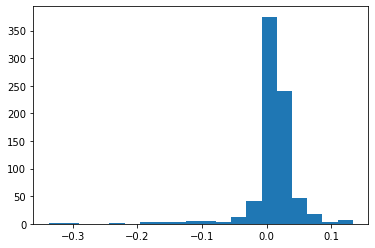

In [53]:
plt.hist(y_error, bins = 20)

In [76]:
np.mean(y_test)

0.0834043470661901

(array([6.360e+02, 1.608e+03, 2.840e+02, 1.150e+02, 1.610e+02, 1.430e+02,
        6.000e+01, 2.300e+01, 2.300e+01, 1.900e+01, 1.100e+01, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.01303645, 0.04657526, 0.08011407, 0.11365288, 0.14719169,
        0.1807305 , 0.21426931, 0.24780812, 0.28134693, 0.31488574,
        0.34842455, 0.38196336, 0.41550217, 0.44904098, 0.48257979,
        0.5161186 , 0.54965741, 0.58319622, 0.61673503, 0.65027385,
        0.68381266]),
 <a list of 20 Patch objects>)

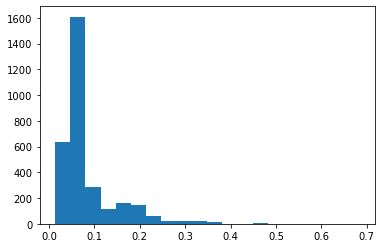

In [78]:
plt.hist(y_train, bins =20)

In [133]:
df_test = pd.read_csv('test.csv')
df_test['y']=predict

In [134]:
df_test.head()

galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   

   Mean years of education (galactic years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.547114         0.556267   
1                               0.497688         0.409969   
2                               0.544744         0.486167   
3                               0.691641         0.523441   
4                               0.530676         0.580418   

   Intergalactic Development Index (IDI), Rank  \
0                                   232.621842   
1                                   247.580771   
2                                   249.798771   
3                                   211.505060   
4                                   234.721069   

   Population using at least basic drinking-water services (%)  \
0                                         105.193088             
1                                          55.730638             
2                                          58.755900             
3                                          70.176431             
4                                          69.768692             

   Population using at least basic sanitation services (%)  \
0                                          64.241392         
1                                          46.217440         
2                                          48.897493         
3                                          61.254104         
4                                          51.316940         

   Gross capital formation (% of GGP)  Population, total (millions)  \
0                           17.418350                           NaN   
1                           33.027886                           NaN   
2                           31.613362                           NaN   
3                           34.399007                           NaN   
4                           15.657091                   1106.554194   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)  \
0                    NaN                                                NaN    
1                    NaN                                                NaN    
2                    NaN                                                NaN    
3                    NaN                                                NaN    
4              64.382217                                         219.588961    

   Mortality rate, infant (per 1,000 live births)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                        

In [136]:
df_test.to_csv('1_sub.csv')

In [70]:
np.sqrt(mean_squared_error(y_test, predict))

0.026365699460053783

In [131]:
len(predict)

890

In [67]:
shap_values = shap.TreeExplainer(gbm).shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


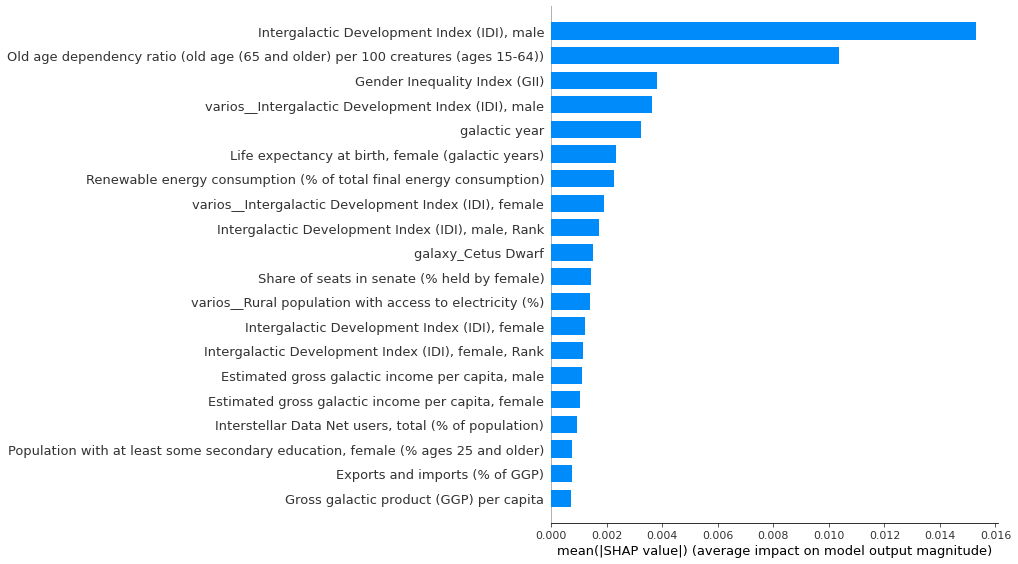

In [68]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

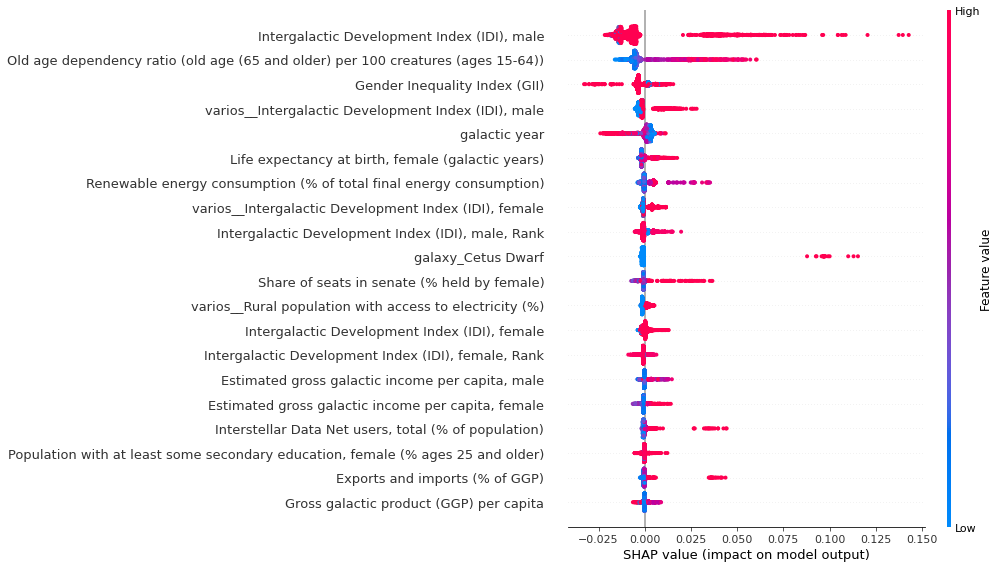

In [69]:
shap.summary_plot(shap_values, X_train)

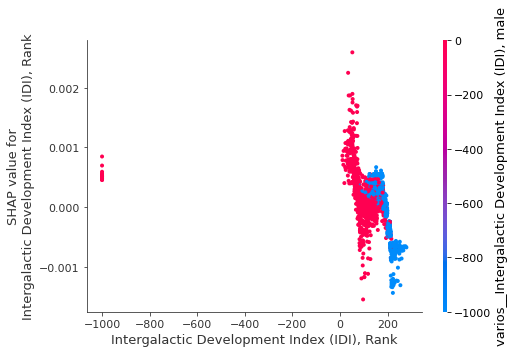

In [70]:
shap.dependence_plot("Intergalactic Development Index (IDI), Rank", shap_values, X_train)

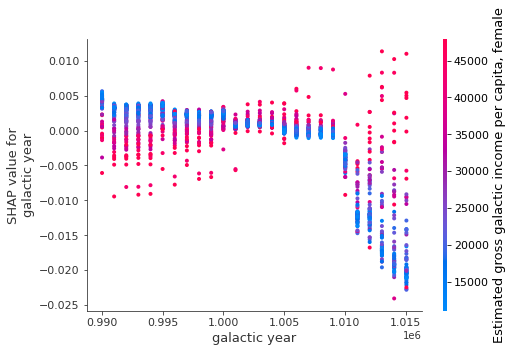

In [71]:
shap.dependence_plot("galactic year", shap_values, X_train)

In [27]:
df['existence expectancy at birth']

0       63.125200
1       81.004994
2       59.570534
3       52.333293
4       81.802464
          ...    
3860    82.832063
3861    75.877098
3862    93.540275
3863    78.274427
3864    91.641356
Name: existence expectancy at birth, Length: 3865, dtype: float64

In [28]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0291 (0.0093)



In [111]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=200,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model)
print(score)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[0.02479986 0.02450353 0.02525597 0.02579321 0.04843546]
LGBM score: 0.0298 (0.0093)



In [ ]:
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.6
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9
          }

## Hyperopt

In [ ]:
lgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.01, 0.1, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'num_leaves':       hp.choice('num_leaves', np.arange(5, 50, 5, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     100,
}
lgb_fit_params = {
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 10,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

In [91]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'learning_rate': '{:.3f}'.format(params['learning_rate']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'subsample': '{:.3f}'.format(params['subsample']),
        'n_estimators': int(params['n_estimators'])
    }
    
    
    gbm = lgb.LGBMRegressor(objective='rmse',  **params
    )
    gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='RMSE',
        verbose = -1,
        early_stopping_rounds=10)
    predict = gbm.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, predict))
    print("RMSE {:.3f} params {}".format(error, params))
    #score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    #print("Gini {:.3f} params {}".format(score, params))
    return {"loss": error, "params": params, 'status': STATUS_OK}

space = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.01, 0.1, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'num_leaves':       hp.choice('num_leaves', np.arange(5, 50, 3, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.7, 1.0, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     1300,
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            trials=trials,
            max_evals=50)

Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[551]	valid_0's rmse: 0.0146086
RMSE 0.015 params {'max_depth': 14, 'num_leaves': 32, 'learning_rate': '0.010', 'colsample_bytree': '0.800', 'subsample': '0.879', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[545]	valid_0's rmse: 0.015033
RMSE 0.015 params {'max_depth': 8, 'num_leaves': 29, 'learning_rate': '0.010', 'colsample_bytree': '0.900', 'subsample': '0.821', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration i

Early stopping, best iteration is:                                                                                     
[462]	valid_0's rmse: 0.0149784
RMSE 0.015 params {'max_depth': 8, 'num_leaves': 47, 'learning_rate': '0.010', 'colsample_bytree': '0.900', 'subsample': '0.906', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[91]	valid_0's rmse: 0.0144998
RMSE 0.014 params {'max_depth': 6, 'num_leaves': 41, 'learning_rate': '0.060', 'colsample_bytree': '0.700', 'subsample': '0.934', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[160]	valid_0's rmse: 0.0145014
R

RMSE 0.015 params {'max_depth': 13, 'num_leaves': 14, 'learning_rate': '0.010', 'colsample_bytree': '0.800', 'subsample': '0.831', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[524]	valid_0's rmse: 0.0142819
RMSE 0.014 params {'max_depth': 14, 'num_leaves': 35, 'learning_rate': '0.010', 'colsample_bytree': '0.700', 'subsample': '0.863', 'n_estimators': 1300}
Training until validation scores don't improve for 10 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[429]	valid_0's rmse: 0.0152185
RMSE 0.015 params {'max_depth': 15, 'num_leaves': 41, 'learning_rate': '0.010', 'colsample_bytree': '1.000', 'subsample': '0.850', 'n_estimators': 130

In [58]:
idx = np.argmin(trials.losses())
print(idx)

print(trials.trials[idx])

# these should be the training parameters to use to achieve the best score in best trial
params = trials.trials[idx]["result"]["params"]

11
{'state': 2, 'tid': 11, 'spec': None, 'result': {'loss': 0.046241621970223516, 'params': {'max_depth': 5, 'num_leaves': 47, 'learning_rate': '0.060', 'colsample_bytree': '0.800', 'subsample': '0.859', 'n_estimators': 1300}, 'status': 'ok'}, 'misc': {'tid': 11, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'colsample_bytree': [11], 'learning_rate': [11], 'max_depth': [11], 'num_leaves': [11], 'subsample': [11]}, 'vals': {'colsample_bytree': [1], 'learning_rate': [1], 'max_depth': [0], 'num_leaves': [14], 'subsample': [0.8593710823432148]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 6, 7, 18, 5, 2, 756000), 'refresh_time': datetime.datetime(2020, 6, 7, 18, 5, 6, 64000)}


In [33]:
params = {
        'max_depth': 4,
        'n_estimators': 100
    }

In [34]:
gbm = lgb.LGBMRegressor(objective='regression', verbose  = -1, verbose_eval = -1,   **params)

In [36]:
gbm.fit(X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='RMSE', verbose = -1,
    early_stopping_rounds=10)
predict = gbm.predict(X_test)

Training until validation scores don't improve for 10 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.00235201	valid_0's rmse: 0.0484976
